## Introduction of the business problem

Defining problem statement : We have dataset of different customers who is intreseted to buy a health insurance. A health insurance company wants to find out the right policy/plan based on the current and past health history of the customers and we are asked to find out estimated cost of insurance by using different sets of variables which are mostly releated to individual's health.

Need of the study/project : We want to do study on this data because health plan mostly depends on the health history and requirements of individual so with this study we can derive some usuful insights that what is the most commoon health parameteres between customers and what cost can be given to this plan and As we know that we need to find out the cost of insurance plan which is a regression problem therefore we will try various regression models.

Understanding business/social opportunity : This case study will be very useful for company to identify most common health condition and by using that company can promote their health plan for that particular health disease/problem.

## Data Report

In [11]:
# importing general necessary liabreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import kurtosis
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Let's import Data Dictionary
df_dict=pd.read_excel('Downloads/Problem Statement.xlsx',sheet_name='Table 3')
df_dict

,Variable,Business Definition
0,applicant_id,Applicant unique ID
1,years_of_insurance_with_u s,Since how many years customer is taking policy...
2,regular_checkup_lasy_year,Number of times customers has done the regular...
3,adventure_sports,Customer is involved with adventure sports lik...
4,Occupation,Occupation of the customer
5,visited_doctor_last_1_year,Number of times customer has visited doctor in...
6,cholesterol_level,Cholesterol level of the customers while apply...
7,daily_avg_steps,Average daily steps walked by customers
8,age,Age of the customer
9,heart_decs_history,Any past heart diseases


In [13]:
# import the dataset
df=pd.read_csv('Cap prjt data.csv')

In [14]:
# top 5 rows of the data
df.head().T

,0,1,2,3,4
applicant_id,5000,5001,5002,5003,5004
years_of_insurance_with_us,3,0,1,7,3
regular_checkup_lasy_year,1,0,0,4,1
adventure_sports,1,0,0,0,0
Occupation,Salried,Student,Business,Business,Student
visited_doctor_last_1_year,2,4,4,2,2
cholesterol_level,125 to 150,150 to 175,200 to 225,175 to 200,150 to 175
daily_avg_steps,4866,6411,4509,6214,4938
age,28,50,68,51,44
heart_decs_history,1,0,0,0,0


In [15]:
# last 5 rows of the data
df.tail()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
24995,29995,3,0,0,Salried,4,225 to 250,5614,22,0,...,smokes,2000.0,Kanpur,79,Y,Rare,Moderate,4,40,39488
24996,29996,6,0,0,Business,4,200 to 225,4719,58,0,...,never smoked,2009.0,Kanpur,66,N,Rare,Moderate,2,28,14808
24997,29997,7,0,1,Student,2,150 to 175,5624,34,0,...,Unknown,NaN,Bhubaneswar,76,N,Rare,Moderate,1,35,33318
24998,29998,1,0,0,Salried,2,225 to 250,10777,27,0,...,Unknown,NaN,Surat,74,N,Rare,Moderate,0,40,30850
24999,29999,8,2,0,Business,4,150 to 175,5882,22,1,...,formerly smoked,2014.0,Chennai,57,N,No,No,4,21,6170


In [16]:
print('Number of Rows :', df.shape[0])
print('Number of columns :', df.shape[1])

Number of Rows : 25000
Number of columns : 24


There are total 25000 rows and 24 columns present in the dataset.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

We have 16 numeric and 8 object data types present in the data.

Even though there are some numeric variables which sounds to be a categorical variables such as 'adventure_sports',  'heart_decs_history', 'other_major_decs_history' but it assigned values of 0 and 1 so it recongnized as numeric variables.

In [18]:
# we can drop the column 'applicant_id' as it does not provide any significant information & just a continuous number.
df.drop('applicant_id', axis=1, inplace=True)

In [19]:
# let's check the descriptive summary of numerical columns in the data.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
years_of_insurance_with_us,25000.0,4.089040,2.606612,0.0,2.0,4.0,6.0,8.0
regular_checkup_lasy_year,25000.0,0.773680,1.199449,0.0,0.0,0.0,1.0,5.0
adventure_sports,25000.0,0.081720,0.273943,0.0,0.0,0.0,0.0,1.0
visited_doctor_last_1_year,25000.0,3.104200,1.141663,0.0,2.0,3.0,4.0,12.0
daily_avg_steps,25000.0,5215.889320,1053.179748,2034.0,4543.0,5089.0,5730.0,11255.0
age,25000.0,44.918320,16.107492,16.0,31.0,45.0,59.0,74.0
heart_decs_history,25000.0,0.054640,0.227281,0.0,0.0,0.0,0.0,1.0
other_major_decs_history,25000.0,0.098160,0.297537,0.0,0.0,0.0,0.0,1.0
avg_glucose_level,25000.0,167.530000,62.729712,57.0,113.0,168.0,222.0,277.0
bmi,24010.0,31.393328,7.876535,12.3,26.1,30.5,35.6,100.6


1. A customer is linked to the company for 8 years in short this customer/customers are very happy with their health plan.

2. Approx 75% or less than 75% customers went for regular check only once in a year.

3. Most of the customers are overweight as per BMI value.

4. Less than or equal to 50% customer's age is 45 and maximum age is 74.

5. Average glucose level of customers is 167 whereas we know normal glucose level is below 100 so are these customers have diabetes.

6. Insurance Cost ranges from approx 2500 to 68K rupees which shows variety of health plans are avialble for customers .

In [20]:
# let's check the descriptive summary of categorical columns in the data.
df.describe(include='object').T

,count,unique,top,freq
Occupation,25000,3,Student,10169
cholesterol_level,25000,5,150 to 175,8763
Gender,25000,2,Male,16422
smoking_status,25000,4,never smoked,9249
Location,25000,15,Bangalore,1742
covered_by_any_other_company,25000,2,N,17418
Alcohol,25000,3,Rare,13752
exercise,25000,3,Moderate,14638


1. Mostly customers don't have any job they are students.

2. Most of the customer's cholesterol_level is B/W 150 to 175 .

3. Most of the customer's are male and don't smoke.

4. Most of the customers don't have any other insurance because mostly are non working so don't have employer's insurance.

5. We have customers from total 15 locations and mostly from Bangalore.

In [21]:
#checking for duplicate values
df.duplicated().sum()

0

No duplicare value present in dataset.

## Exploratory data analysis

### Univariate analysis

We will do analysis of each individual numeric variable by using boxplot and histogram.

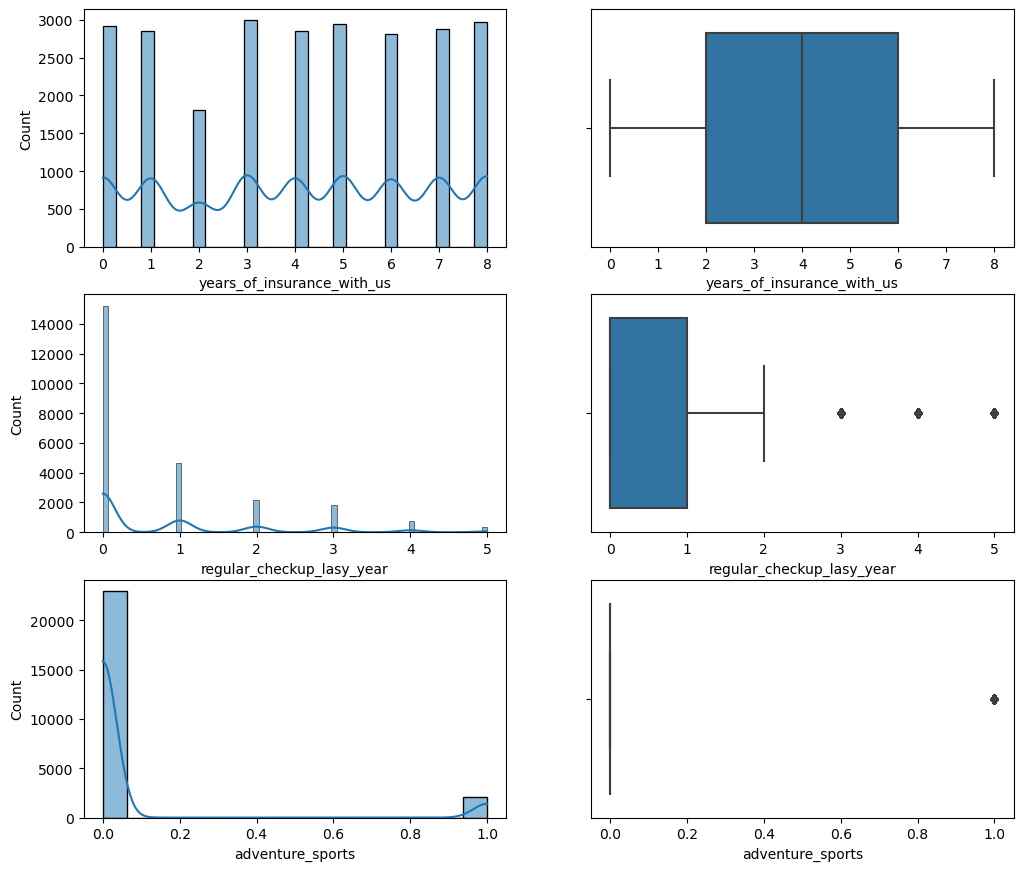

In [22]:
fig, axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12,10.5)
sns.histplot(df['years_of_insurance_with_us'], kde=True, ax=axes[0][0])
sns.boxplot(x=df['years_of_insurance_with_us'], ax=axes[0][1])
sns.histplot(df['regular_checkup_lasy_year'], kde=True, ax=axes[1][0])
sns.boxplot(x=df['regular_checkup_lasy_year'], ax=axes[1][1])
sns.histplot(df['adventure_sports'], kde=True, ax=axes[2][0])
sns.boxplot(x=df['adventure_sports'], ax=axes[2][1])
plt.show();

We can see median value is 4 years for customer having same insurance.

Outliers present in the column regular_check_last_year as some of the customers went for checkup more than the other cusstomers.

Adventure_sports is just a binary value yes or no so we can not say that this is an outlier.

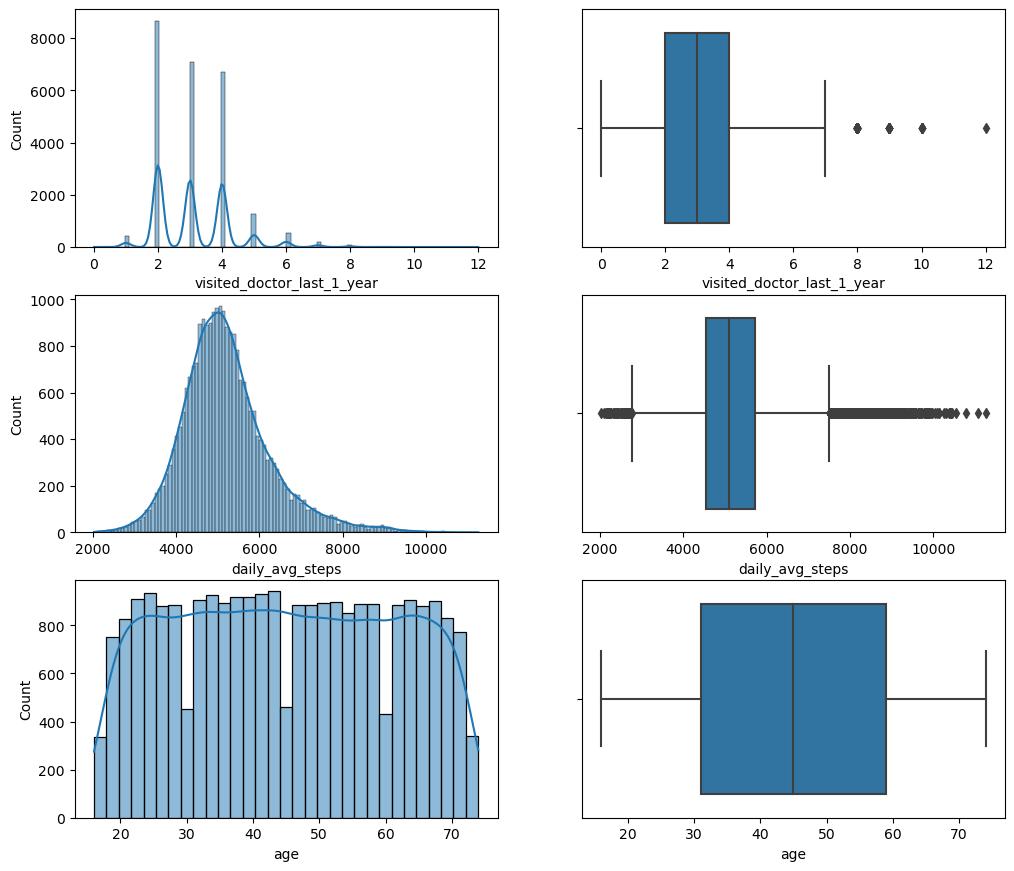

In [23]:
fig, axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12,10.5)
sns.histplot(df['visited_doctor_last_1_year'], kde=True, ax=axes[0][0])
sns.boxplot(x=df['visited_doctor_last_1_year'], ax=axes[0][1])
sns.histplot(df['daily_avg_steps'], kde=True, ax=axes[1][0])
sns.boxplot(x=df['daily_avg_steps'], ax=axes[1][1])
sns.histplot(df['age'], kde=True, ax=axes[2][0])
sns.boxplot(x=df['age'], ax=axes[2][1])
plt.show();

Distribution in the column 'visited_doctor_last_1_year' & 'cholesterol_level' is postive and median age of customers is 45.

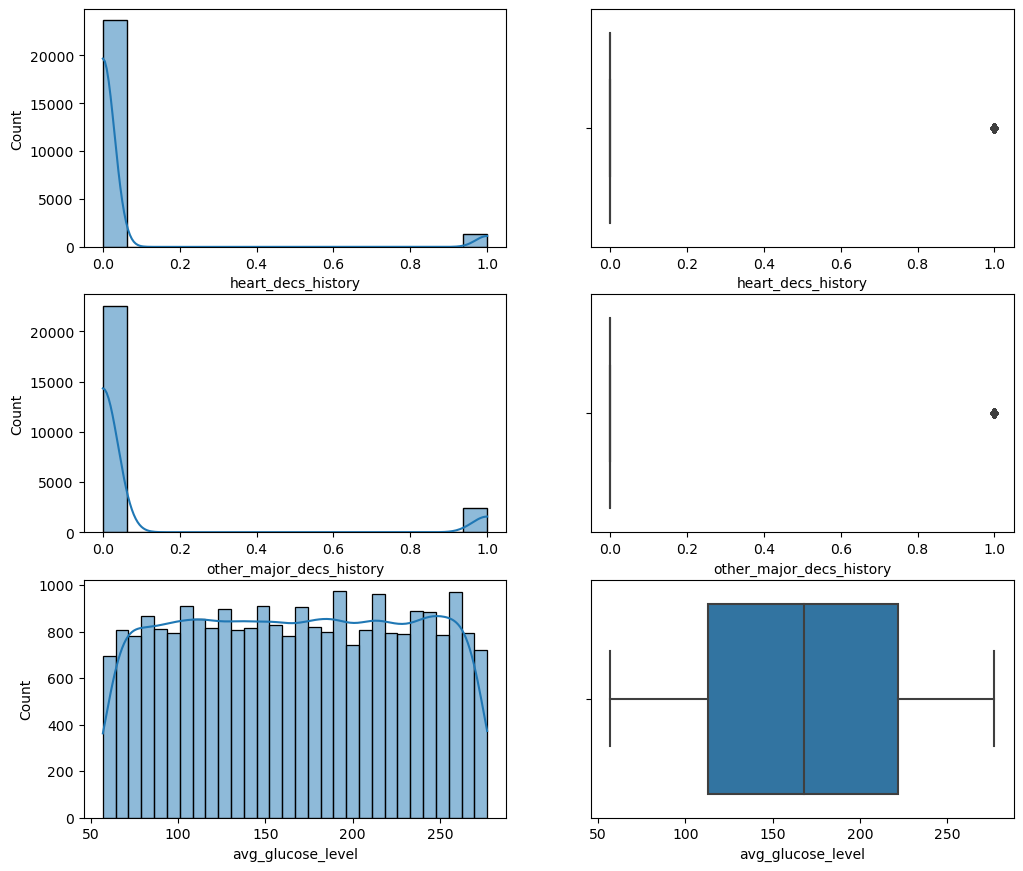

In [24]:
fig, axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12,10.5)
sns.histplot(df['heart_decs_history'], kde=True, ax=axes[0][0])
sns.boxplot(x=df['heart_decs_history'], ax=axes[0][1])
sns.histplot(df['other_major_decs_history'], kde=True, ax=axes[1][0])
sns.boxplot(x=df['other_major_decs_history'], ax=axes[1][1])
sns.histplot(df['avg_glucose_level'], kde=True, ax=axes[2][0])
sns.boxplot(x=df['avg_glucose_level'], ax=axes[2][1]);

variable heart_decs_history & other_major_decs_history are just a binary value yes or no so we can not say that this is an outlier.

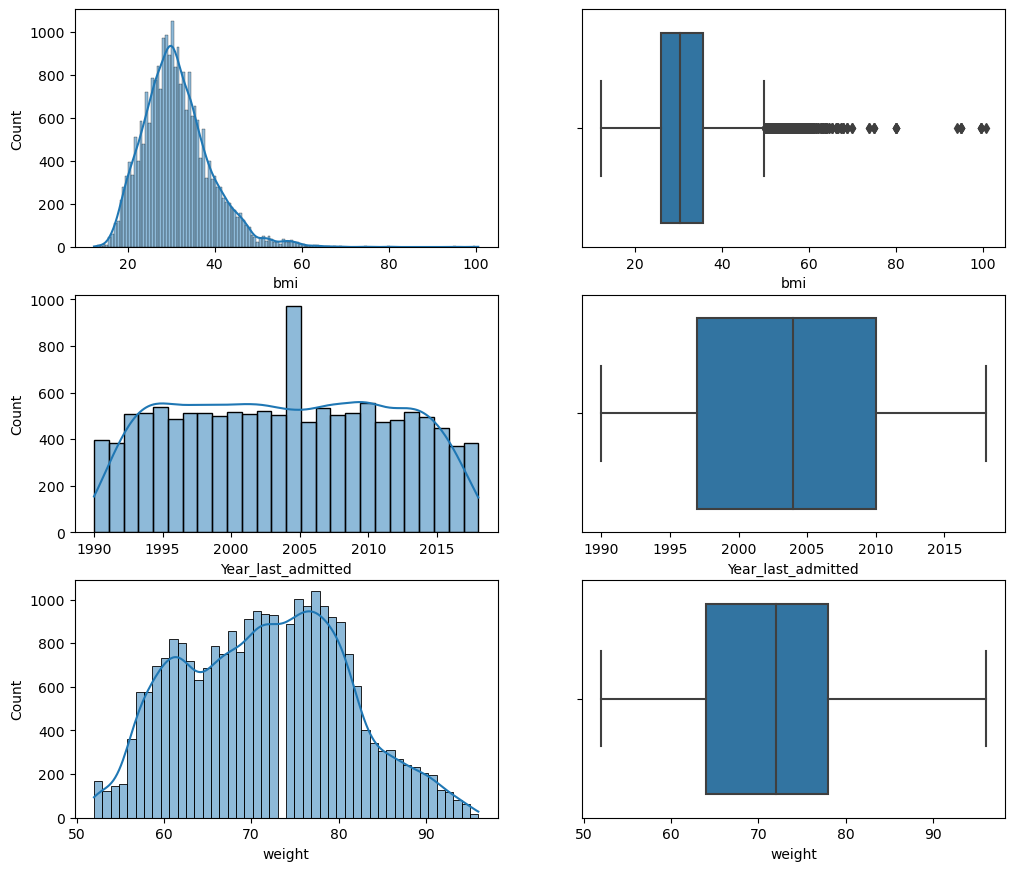

In [25]:
fig, axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12,10.5)
sns.histplot(df['bmi'], kde=True, ax=axes[0][0])
sns.boxplot(x=df['bmi'], ax=axes[0][1])
sns.histplot(df['Year_last_admitted'], kde=True, ax=axes[1][0])
sns.boxplot(x=df['Year_last_admitted'], ax=axes[1][1])
sns.histplot(df['weight'], kde=True, ax=axes[2][0])
sns.boxplot(x=df['weight'], ax=axes[2][1]);

We have outliers in BMI and distribution is positive.

We can say that number of customers who were admitted to hospital till 2010 is <= 75% .

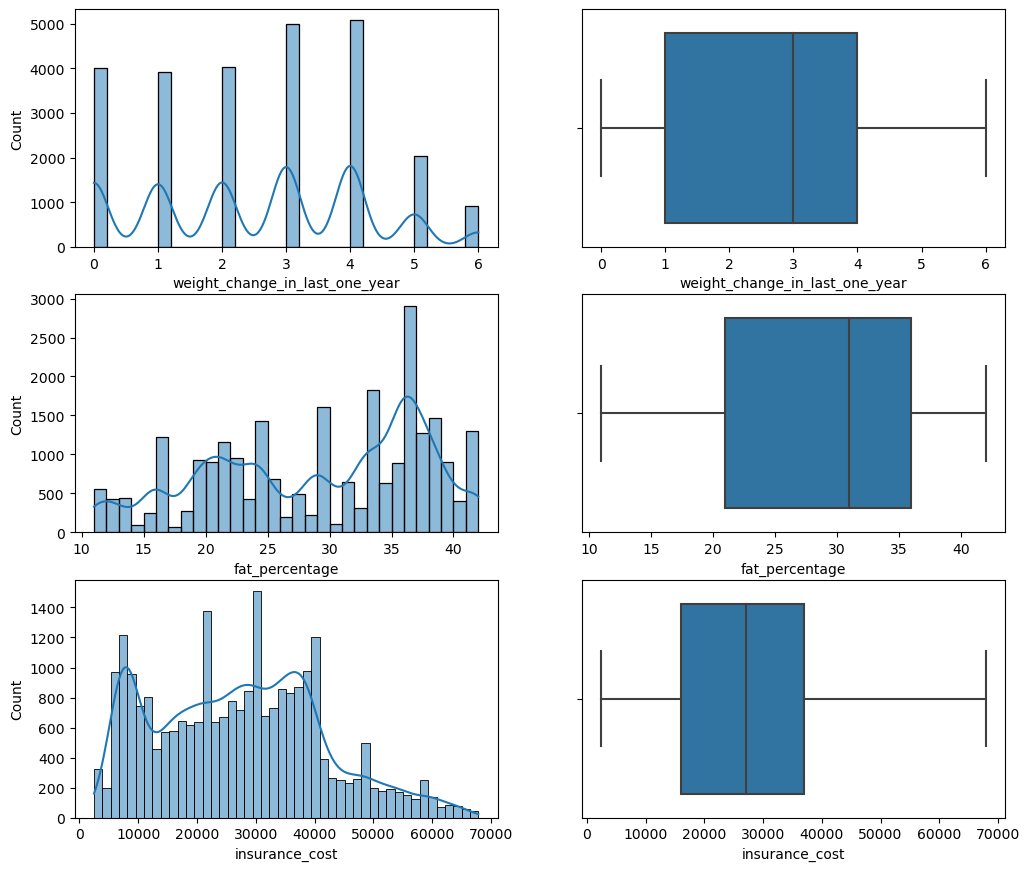

In [26]:
fig, axes=plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12,10.5)
sns.histplot(df['weight_change_in_last_one_year'], kde=True, ax=axes[0][0])
sns.boxplot(x=df['weight_change_in_last_one_year'], ax=axes[0][1])
sns.histplot(df['fat_percentage'], kde=True, ax=axes[1][0])
sns.boxplot(x=df['fat_percentage'], ax=axes[1][1])
sns.histplot(df['insurance_cost'], kde=True, ax=axes[2][0])
sns.boxplot(x=df['insurance_cost'], ax=axes[2][1]);

Distribution of fat_percentage is left skewed and it ranges from 10 to 40+

Average weight change in last 1 year is less than 3kg.

<AxesSubplot: xlabel='count', ylabel='exercise'>

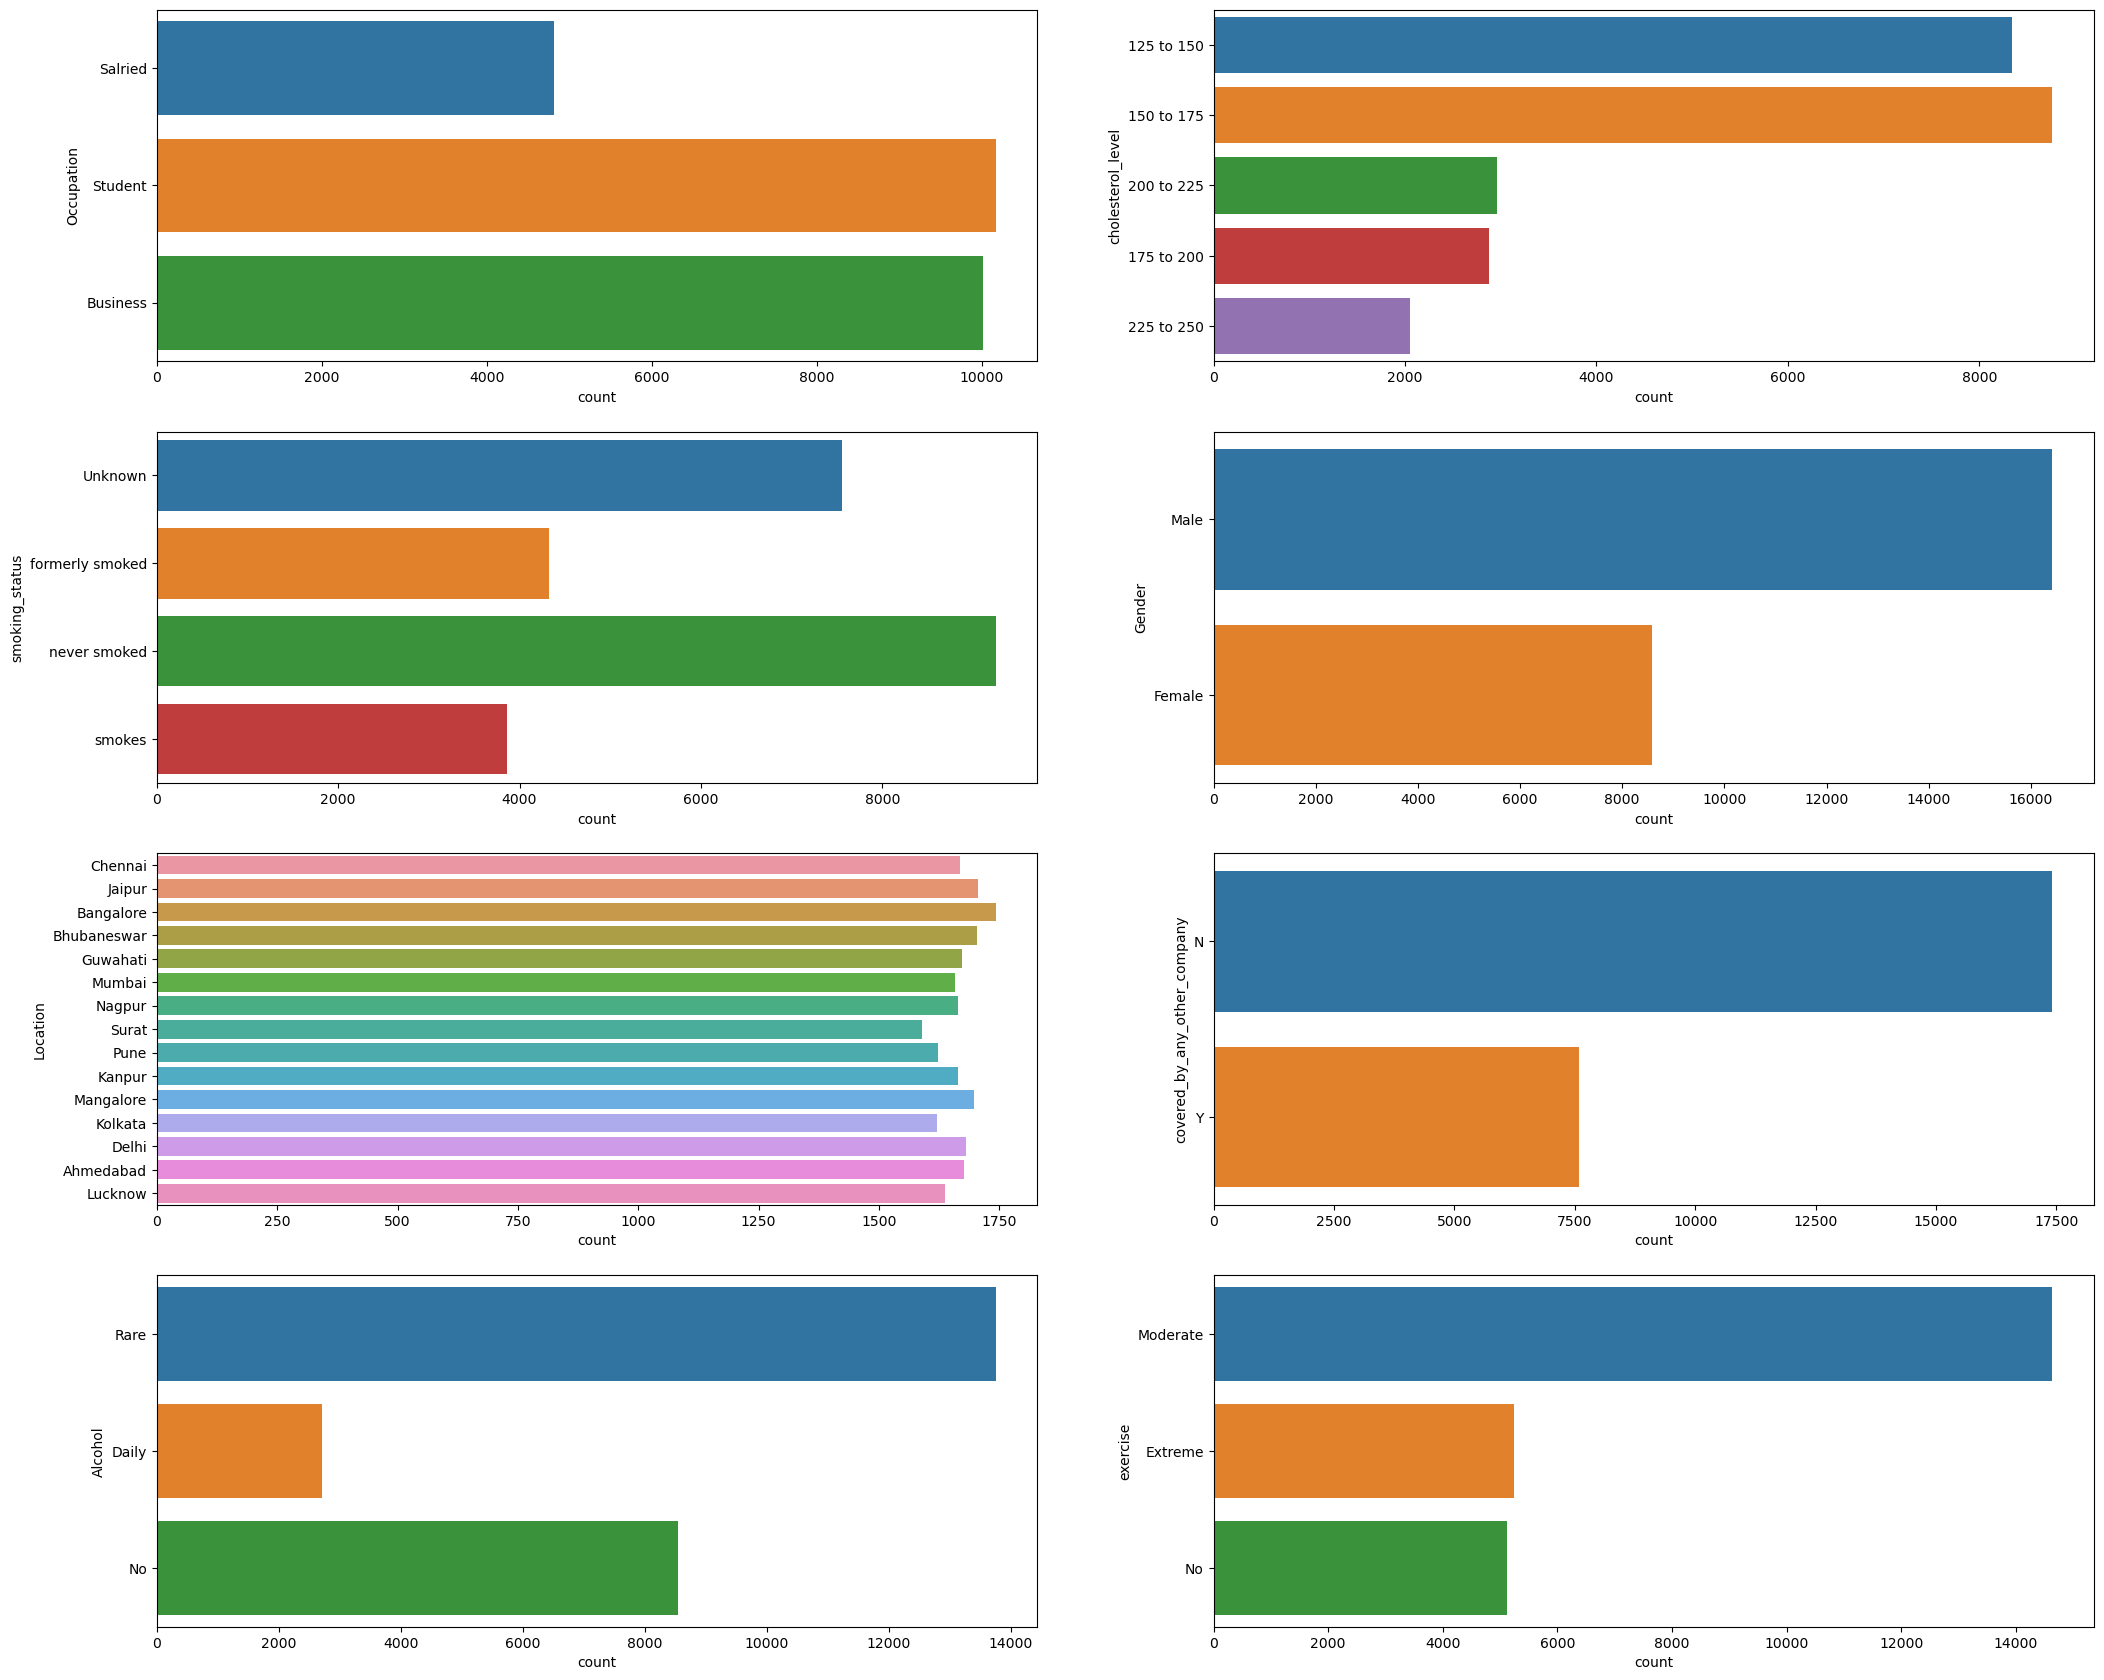

In [27]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(25,21)
sns.countplot(y=df['Occupation'], ax=axes[0][0],)
sns.countplot(y=df['cholesterol_level'], ax=axes[0][1])
sns.countplot(y=df['smoking_status'], ax=axes[1][0])
sns.countplot(y=df['Gender'], ax=axes[1][1])
sns.countplot(y=df['Location'], ax=axes[2][0])
sns.countplot(y=df['covered_by_any_other_company'], ax=axes[2][1])
sns.countplot(y=df['Alcohol'], ax=axes[3][0])
sns.countplot(y=df['exercise'], ax=axes[3][1])

Most of the customer's cholesterol_level is b/w 125 to 150 and 150 to 175 BUT there are customers whose CL is >200 which is high.

We have customer from different location and none of the location is too dominating.

Most of the customer do consume alcohol.

There are customers whose smoking status is unknown so these could be smokers or non smokers.

### Bivariate analysis

<AxesSubplot: xlabel='Occupation', ylabel='count'>

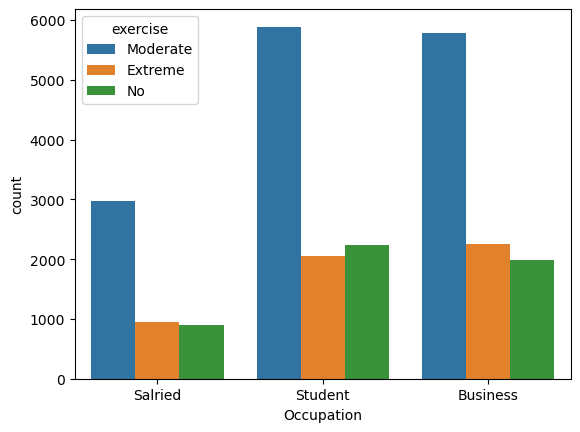

In [28]:
sns.countplot(x=df['Occupation'], hue=df['exercise'])

Customers with occuptation as business/student do more excersise compare to salaried person & it can be due to the busy schedule of salaried person.

<AxesSubplot: xlabel='Occupation', ylabel='count'>

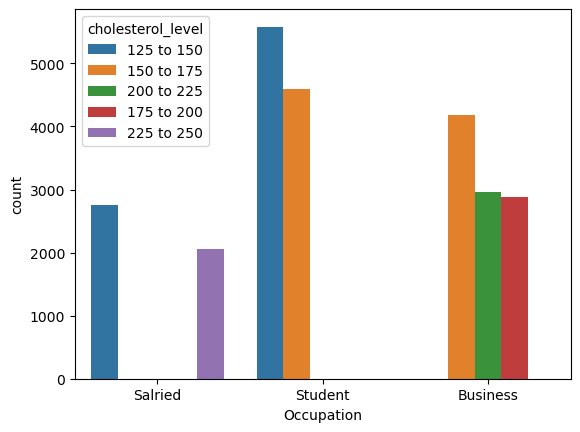

In [29]:
sns.countplot(x=df['Occupation'], hue=df['cholesterol_level'])

We can see very high cholesterol level(225-250) is only between salried customers and second highest colesterol level(200-225) is only in customers whose occupation is business.

Customer who don't have any designated occupation(student) have cholesterol level in control.

Cholesterol level of salried customer is either in control OR it's too high.

<AxesSubplot: xlabel='cholesterol_level', ylabel='age'>

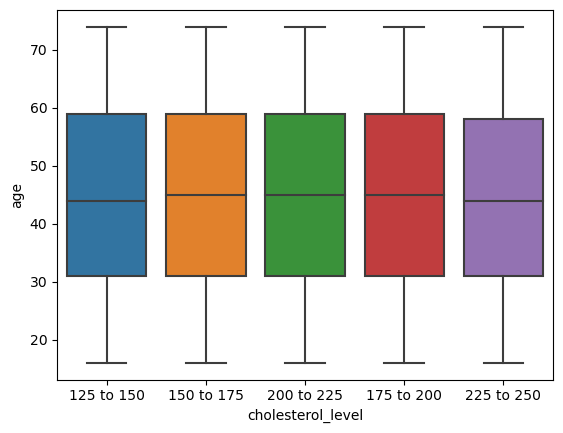

In [30]:
sns.boxplot(x=df['cholesterol_level'], y=df['age'])

Median age of the customers is almost same across 5 cholesterol level.

<AxesSubplot: xlabel='weight', ylabel='insurance_cost'>

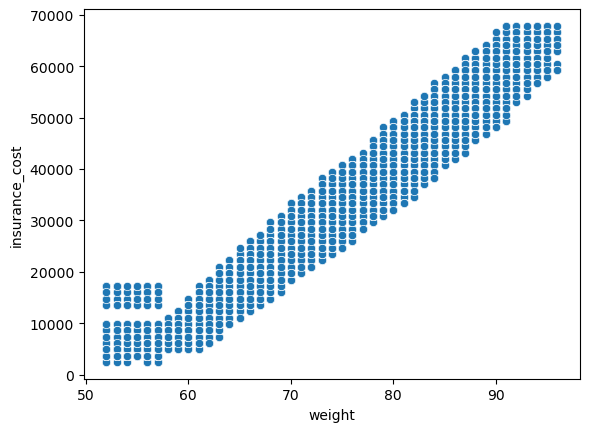

In [31]:
sns.scatterplot(data=df, x='weight',y='insurance_cost')

We can see very strong correlation b/w weight and insurance cost that means insurance cost will increase if weight increases.

In [32]:
cor=df.corr();

In [33]:
matrix = np.triu(cor)

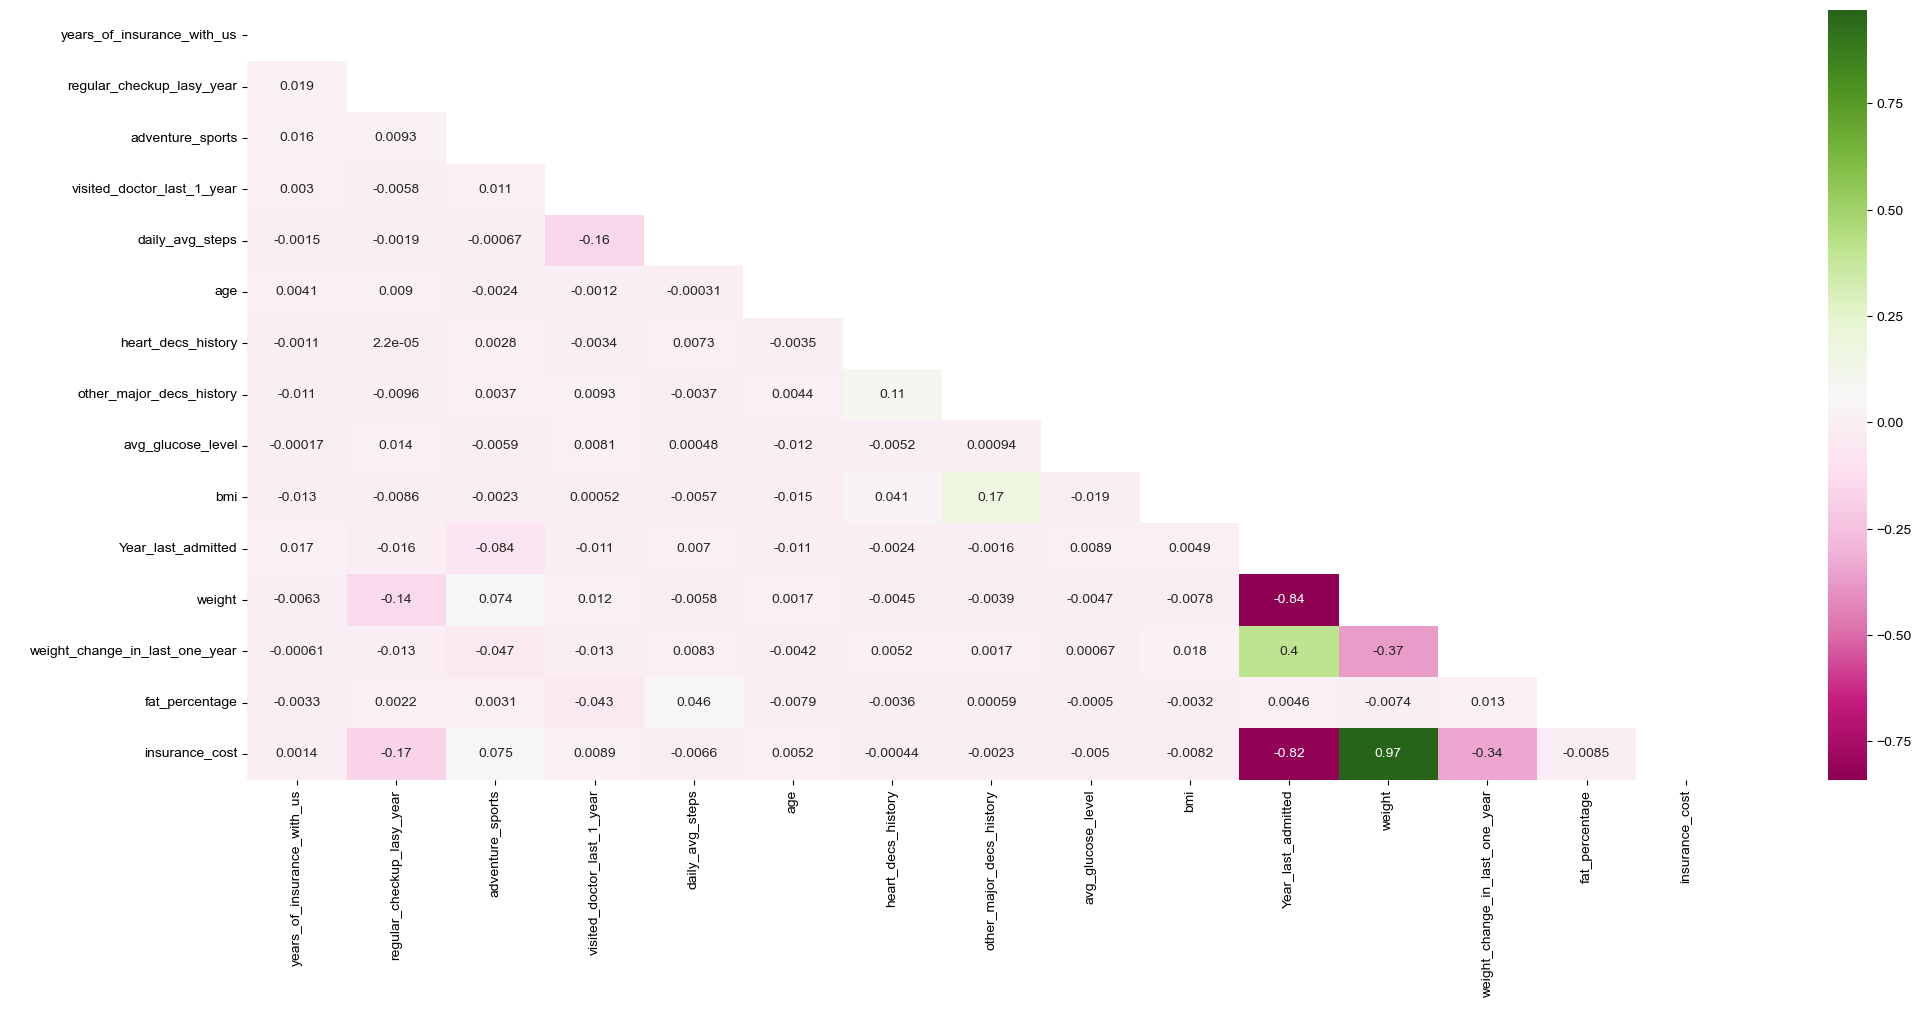

In [34]:
plt.figure(figsize=(24,10))
sns.heatmap(data=cor, annot=True, mask=matrix,cmap="PiYG")
sns.set(font_scale=1.50);

From above heatmap we can see that only few of the variables are correlated .

### Removal of unwanted variables

We have already removed 1 unwanted variables 'applicant_id' for now and will remove other variable if it's not significant for our model building.

Test for significance of caterogrical variables vs insurance_cost by using Anova, It estimates the extent to which a dependent variable is affected by one or more independent categorical data elements.

In [35]:
# let's select all categorical variables
categorical_col=df.select_dtypes(include='object')

In [36]:
categorical_col.shape[1]

8

Null hypothesis H0: There is no statistically significant difference in the means of different groups of the independent variable.

Alternate Hypothesis H1: There is a statistically significant difference between the means of different groups of the independent variable.

In [37]:
for x in categorical_col:
    model = ols('insurance_cost' + '~' + x, data = df).fit() #Oridnary least square method
    result_anova = sm.stats.anova_lm(model) # ANOVA Test
    print(result_anova)

                 df        sum_sq       mean_sq         F    PR(>F)
Occupation      2.0  4.533004e+08  2.266502e+08  1.104714  0.331322
Residual    24997.0  5.128545e+12  2.051664e+08       NaN       NaN
                        df        sum_sq       mean_sq         F    PR(>F)
cholesterol_level      4.0  1.095666e+09  2.739165e+08  1.335154  0.254132
Residual           24995.0  5.127903e+12  2.051571e+08       NaN       NaN
               df        sum_sq       mean_sq         F    PR(>F)
Gender        1.0  2.369661e+07  2.369661e+07  0.115494  0.733976
Residual  24998.0  5.128975e+12  2.051754e+08       NaN       NaN
                     df        sum_sq       mean_sq         F    PR(>F)
smoking_status      3.0  4.235646e+08  1.411882e+08  0.688133  0.559158
Residual        24996.0  5.128575e+12  2.051758e+08       NaN       NaN
               df        sum_sq       mean_sq         F    PR(>F)
Location     14.0  2.245657e+09  1.604040e+08  0.781722  0.690403
Residual  24985.0  5.1267

Based on this anova test we are failed to reject the null hypothesis (p-Value not less than 0.05) for 7 variables hence these variables are dropped moving forward. 

In [38]:
df.drop(['Occupation','cholesterol_level','Gender','smoking_status','Location','Alcohol','exercise'], axis=1, inplace=True)

In [39]:
df.head()

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,visited_doctor_last_1_year,daily_avg_steps,age,heart_decs_history,other_major_decs_history,avg_glucose_level,bmi,Year_last_admitted,weight,covered_by_any_other_company,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,3,1,1,2,4866,28,1,0,97,31.2,NaN,67,N,1,25,20978
1,0,0,0,4,6411,50,0,0,212,34.2,NaN,58,N,3,27,6170
2,1,0,0,4,4509,68,0,0,166,40.4,NaN,73,N,0,32,28382
3,7,4,0,2,6214,51,0,0,109,22.9,NaN,71,Y,3,37,27148
4,3,1,0,2,4938,44,0,1,118,26.5,2004.0,74,N,0,34,29616


So we cut down to 16 variables and only 1 categorical variable present now. 

### Missing Value treatment

In [40]:
# lets check missing values 
null=df.isna().sum()
null[null.values>0].sort_values(ascending=False)

Year_last_admitted    11881
bmi                     990
dtype: int64

We can see that we have missing value present in these 2 variables and lets check what is the percentage count of missing values.

In [41]:
(null[null>0]/25000)*100

bmi                    3.960
Year_last_admitted    47.524
dtype: float64

We can see that in variable 'Year_last_admitted' we have 47% missing values which is more than 30% and so we can drop this column.

In [42]:
df.drop('Year_last_admitted', axis=1, inplace=True)

Whereas for variable 'bmi' we can impute these missing values by using median value as outliers present in our data for variable 'bmi' .

In [43]:
df['bmi']=df['bmi'].fillna(df['bmi'].median())

In [44]:
df.isna().sum()

years_of_insurance_with_us        0
regular_checkup_lasy_year         0
adventure_sports                  0
visited_doctor_last_1_year        0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
avg_glucose_level                 0
bmi                               0
weight                            0
covered_by_any_other_company      0
weight_change_in_last_one_year    0
fat_percentage                    0
insurance_cost                    0
dtype: int64

### Outlier treatment

As we have seen in univariate analysis that few of the variables have outliers so let's visualize boxplot of those variables 

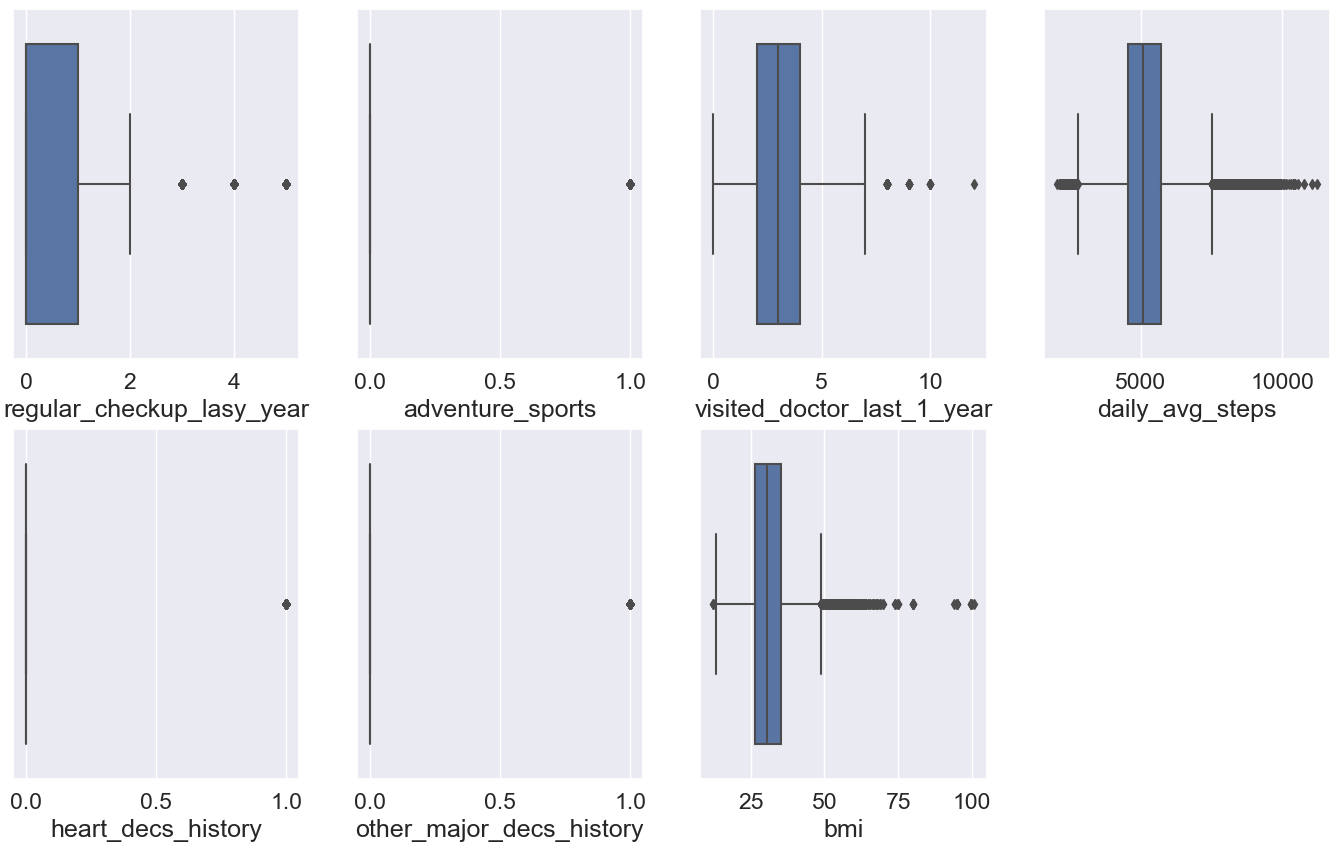

In [45]:
fig,axes= plt.subplots(nrows=2,ncols=4)
fig.set_size_inches(17,10)
sns.boxplot(data=df, x='regular_checkup_lasy_year',ax=axes[0][0])
sns.boxplot(data=df, x='adventure_sports',ax=axes[0][1])
sns.boxplot(data=df, x='visited_doctor_last_1_year',ax=axes[0][2])
sns.boxplot(data=df, x='daily_avg_steps',ax=axes[0][3])
sns.boxplot(data=df, x='heart_decs_history',ax=axes[1][0])
sns.boxplot(data=df, x='other_major_decs_history',ax=axes[1][1])
sns.boxplot(data=df, x='bmi',ax=axes[1][2])
fig.delaxes(axes[1,3])

Variables like 'heart_decs_history', 'other_major_decs_history','adventure_sports' only have values 0 and 1 so this is not an outliers and so we are not treating it.

Whereas extrme values of other variables shows abnormal behaviour like usual yearly_regular_checkup is 1 but values such as 4 & 5 looks strange

Similarly for variables 'visited_doctor_last_1_year' , 'daily_avg_steps' & 'bmi'  exterme values looks strange compare to usual standard values.

We are using IQR method to treat the outliers.

In [46]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    Lower_range=Q1-(1.5 * IQR)
    Upper_range=Q3+(1.5 * IQR)
    return Lower_range,Upper_range

In [47]:
Lower_range,Upper_range=remove_outlier(df['regular_checkup_lasy_year'])
df['regular_checkup_lasy_year']=np.where(df['regular_checkup_lasy_year']>Upper_range,Upper_range,df['regular_checkup_lasy_year'])
df['regular_checkup_lasy_year']=np.where(df['regular_checkup_lasy_year']<Lower_range,Lower_range,df['regular_checkup_lasy_year'])

In [48]:
Lower_range,Upper_range=remove_outlier(df['visited_doctor_last_1_year'])
df['visited_doctor_last_1_year']=np.where(df['visited_doctor_last_1_year']>Upper_range,Upper_range,df['visited_doctor_last_1_year'])
df['visited_doctor_last_1_year']=np.where(df['visited_doctor_last_1_year']<Lower_range,Lower_range,df['visited_doctor_last_1_year'])

In [49]:
Lower_range,Upper_range=remove_outlier(df['daily_avg_steps'])
df['daily_avg_steps']=np.where(df['daily_avg_steps']>Upper_range,Upper_range,df['daily_avg_steps'])
df['daily_avg_steps']=np.where(df['daily_avg_steps']<Lower_range,Lower_range,df['daily_avg_steps'])

In [50]:
Lower_range,Upper_range=remove_outlier(df['bmi'])
df['bmi']=np.where(df['bmi']>Upper_range,Upper_range,df['bmi'])
df['bmi']=np.where(df['bmi']<Lower_range,Lower_range,df['bmi'])

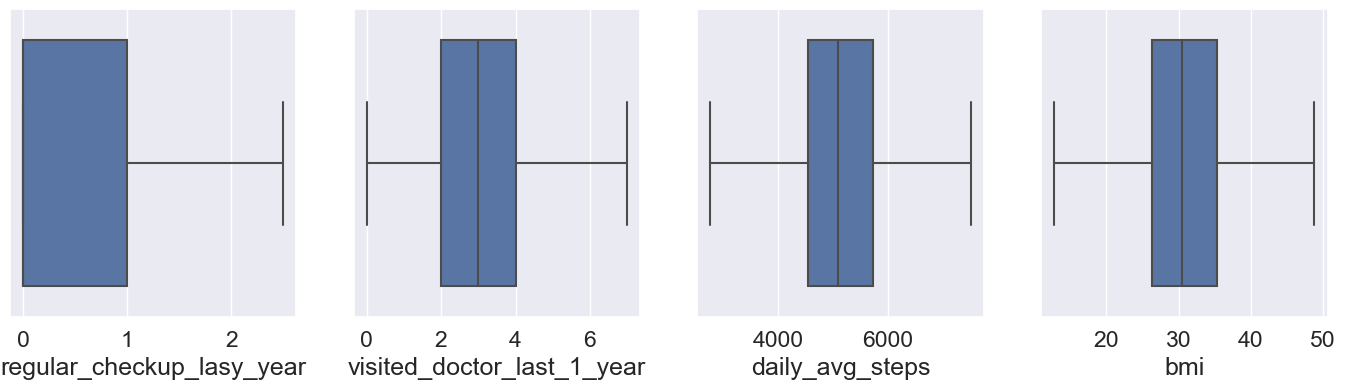

In [51]:
fig,axes= plt.subplots(ncols=4)
fig.set_size_inches(17,4)
sns.boxplot(data=df, x='regular_checkup_lasy_year',ax=axes[0])
sns.boxplot(data=df, x='visited_doctor_last_1_year',ax=axes[1])
sns.boxplot(data=df, x='daily_avg_steps',ax=axes[2])
sns.boxplot(data=df, x='bmi',ax=axes[3]);

We have successfully treated the outliers.

### Variable transformation

As we will build different ML models and each alogrithm has its own condition so if algorithm demands scaling and we are not using scaled date than it's a problem but there is no problem to use scaled data for an algorithm which does not require scaling therefore it's better to scaled the data and use it for all algorithm & we are using A z-score, or standard score for scaling which bring mean to 0 and standard deviation to 1 .

In [52]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [53]:
data=df.copy()

In [54]:
df['years_of_insurance_with_us'] = std_scale.fit_transform(df[['years_of_insurance_with_us']])
df['regular_checkup_lasy_year'] = std_scale.fit_transform(df[['regular_checkup_lasy_year']])
df['adventure_sports'] = std_scale.fit_transform(df[['adventure_sports']])
df['visited_doctor_last_1_year']= std_scale.fit_transform(df[['visited_doctor_last_1_year']])
df['daily_avg_steps']= std_scale.fit_transform(df[['daily_avg_steps']])
df['age']= std_scale.fit_transform(df[['age']])
df['heart_decs_history']= std_scale.fit_transform(df[['heart_decs_history']])
df['avg_glucose_level']= std_scale.fit_transform(df[['avg_glucose_level']])
df['other_major_decs_history']= std_scale.fit_transform(df[['other_major_decs_history']])
df['bmi']= std_scale.fit_transform(df[['bmi']])
df['weight']= std_scale.fit_transform(df[['weight']])
df['weight_change_in_last_one_year']= std_scale.fit_transform(df[['weight_change_in_last_one_year']])
df['fat_percentage']= std_scale.fit_transform(df[['fat_percentage']])
df['insurance_cost']= std_scale.fit_transform(df[['insurance_cost']])

In [55]:
df.head().T

,0,1,2,3,4
years_of_insurance_with_us,-0.417807,-1.56875,-1.185102,1.116783,-0.417807
regular_checkup_lasy_year,0.374779,-0.714377,-0.714377,2.008512,0.374779
adventure_sports,3.35215,-0.298316,-0.298316,-0.298316,-0.298316
visited_doctor_last_1_year,-0.980772,0.803748,0.803748,-0.980772,-0.980772
daily_avg_steps,-0.33316,1.260326,-0.701364,1.057144,-0.258901
age,-1.05036,0.315492,1.433007,0.377576,-0.057013
heart_decs_history,4.15952,-0.240412,-0.240412,-0.240412,-0.240412
other_major_decs_history,-0.329915,-0.329915,-0.329915,-0.329915,3.031081
avg_glucose_level,-1.12437,0.708929,-0.024391,-0.933069,-0.789594
bmi,0.002231,0.422682,1.291613,-1.161015,-0.656474


In [56]:
df.shape

(25000, 15)

### Addition of new variables 

As per looking at the variables don't see any variables needs to be added but we need to encode the categorical variable 'covered_by_any_other_company' as model will not read string data therefore we are using Onehot encoding to create dummy variables to replace the categories in a categorical variable into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical value in the record 

In [57]:
df = pd.get_dummies(df, columns = ['covered_by_any_other_company'],drop_first=True)

In [58]:
df.head()

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,visited_doctor_last_1_year,daily_avg_steps,age,heart_decs_history,other_major_decs_history,avg_glucose_level,bmi,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost,covered_by_any_other_company_Y
0,-0.417807,0.374779,3.352150,-0.980772,-0.333160,-1.050360,4.159520,-0.329915,-1.124370,0.002231,-0.494422,-0.898041,-0.441634,-0.430722,0
1,-1.568750,-0.714377,-0.298316,0.803748,1.260326,0.315492,-0.240412,-0.329915,0.708929,0.422682,-1.459569,0.285180,-0.209944,-1.464554,0
2,-1.185102,-0.714377,-0.298316,0.803748,-0.701364,1.433007,-0.240412,-0.329915,-0.024391,1.291613,0.149010,-1.489652,0.369282,0.086194,0
3,1.116783,2.008512,-0.298316,-0.980772,1.057144,0.377576,-0.240412,-0.329915,-0.933069,-1.161015,-0.065467,0.285180,0.948508,0.000041,1
4,-0.417807,0.374779,-0.298316,-0.980772,-0.258901,-0.057013,-0.240412,3.031081,-0.789594,-0.656474,0.256249,-1.489652,0.600972,0.172347,0


In the data set, each Category in categorical column has been added as column with values 0 and 1 Example: covered_by_any_other_company_Y if covered_by_any_other_company_Y =1, then it means customer is covered by other company and if covered_by_any_other_company_Y = 0 means customer not covered by other company.

### Business insights from EDA 

Data unbalanced : As we know that this a regression problem so we are not talking about class imbalanced of target variable instead we will talk classes of indipendent variables.

From statistical summary and data visualizaion we have identified that there is class imbalance in variable 'Gender' because majority of customers are male so this class becomes more dominating and we have removed this column as per Anova test results.

Similarly for variables such as 'adventure_sports', 'heart_decs_history', 'other_major_decs_history' we have binary class which shows Yes or NO and in these variables classes which indicate No (0) are in majority which is good for business prespective for variables such as 'heart_decs_history' & 'other_major_decs_history' and not good for variable 'adventure_sports' .

#### Clustering of data

We have 2 clustering techinque available hierarchical & K-Means clustering but here we are using K-Means clustering because this is better for large dataset.

In [59]:
from sklearn.cluster import KMeans

Forming 2 Clusters with K=2

In [60]:
k_means = KMeans(n_clusters = 2,random_state=1)

In [61]:
k_means.fit(df)

KMeans(n_clusters=2, random_state=1)

In [62]:
k_means.inertia_

317372.72000043985

##### Calculating WSS for other values of K - Elbow Method

In [63]:
wss =[] 

In [64]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df)
    wss.append(KM.inertia_)

In [65]:
wss

[355282.53103999933,
 317372.72000043985,
 294612.4859579404,
 280559.5757112186,
 261436.41840024188,
 242683.4283856292,
 234699.30839537078,
 228320.0948878164,
 223236.09779134806,
 218925.7438040151]

In [66]:
N_clusters =[1,2,3,4,5,6,7,8,9,10]

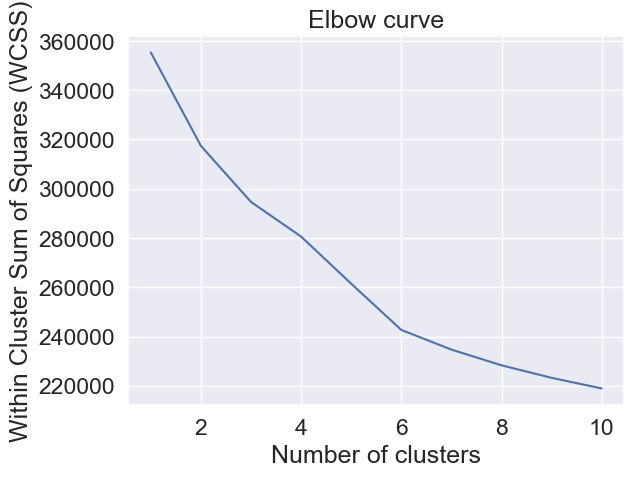

In [67]:
plt.plot(N_clusters, wss)
plt.title('Elbow curve')
plt.xlabel('Number of clusters')                      
plt.ylabel('Within Cluster Sum of Squares (WCSS)');

Let's check Silhoutee score for all clusters

In [68]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [69]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k,random_state=1).fit(df)
  labels = kmeans.labels_
  sil.append(silhouette_score(df, labels,random_state=1))

In [70]:
sil

[0.10473465924399396,
 0.1186109554062133,
 0.10748892293570896,
 0.11436436519926925,
 0.1253621196368049,
 0.10319783814235227,
 0.0942761454818858,
 0.09139129563149591,
 0.08937672785993482]

In [71]:
k_means1 = KMeans(n_clusters =6 ,random_state=1)
k_means1.fit(df)
labels3 = k_means1.labels_

In [72]:
silhouette_score(df,labels3,random_state=1)

0.1253621196368049

In [73]:
N_clusters_9 =[2,3,4,5,6,7,8,9,10]

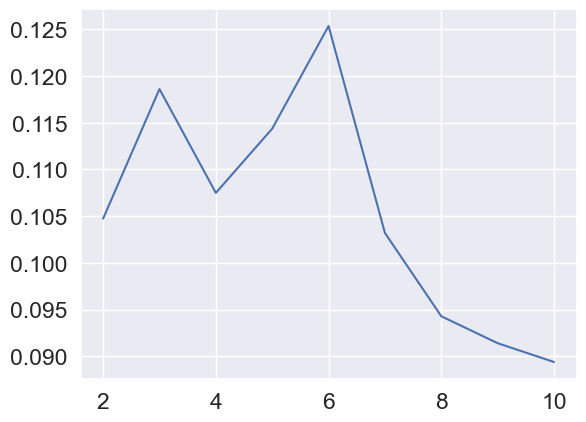

In [74]:
plt.plot(N_clusters_9, sil)

From above elbow method and silhouette_score we can see that optimal number of clusters are 6 as Wss is not dropping significantly after cluster 6 and silhouette_score of cluster 6 is better than other clusters therefore it's suggested that we use 6 optimum clusters.

##### dendrogram

In [75]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [76]:
wardlink= linkage(df, method='ward')

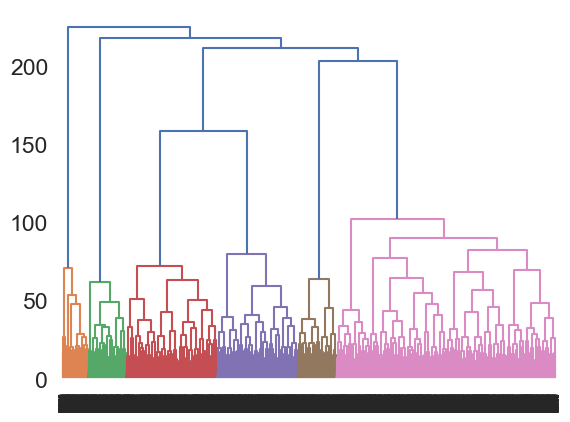

In [77]:
dend=dendrogram(wardlink)

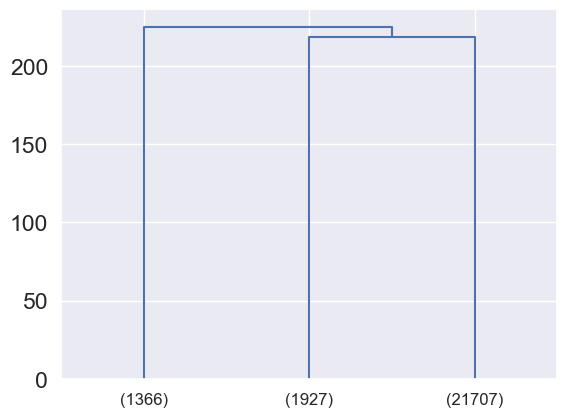

In [78]:
dend=dendrogram(wardlink,truncate_mode='lastp',p=3)

From above dendogram we can see that one of the cluster is too dominating and contain 87% data points so this clustering technique is not able to separate the data ponits in proper manner therefore we are using Kmeans clustering where we got 6 clusters.

Appending Clusters to the original dataset

In [79]:
data["Clus_kmeans"] =labels3
data.head()

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,visited_doctor_last_1_year,daily_avg_steps,age,heart_decs_history,other_major_decs_history,avg_glucose_level,bmi,weight,covered_by_any_other_company,weight_change_in_last_one_year,fat_percentage,insurance_cost,Clus_kmeans
0,3,1.0,1,2.0,4866.0,28,1,0,97,31.2,67,N,1,25,20978,4
1,0,0.0,0,4.0,6411.0,50,0,0,212,34.2,58,N,3,27,6170,3
2,1,0.0,0,4.0,4509.0,68,0,0,166,40.4,73,N,0,32,28382,0
3,7,2.5,0,2.0,6214.0,51,0,0,109,22.9,71,Y,3,37,27148,1
4,3,1.0,0,2.0,4938.0,44,0,1,118,26.5,74,N,0,34,29616,5


In [80]:
data['Clus_kmeans'].value_counts()

0    8978
3    6191
1    4584
5    1955
2    1926
4    1366
Name: Clus_kmeans, dtype: int64

In [81]:
data.groupby('Clus_kmeans').mean().T

Clus_kmeans,0,1,2,3,4,5
years_of_insurance_with_us,4.047449,4.210515,4.224818,4.054757,4.076867,3.978517
regular_checkup_lasy_year,0.185008,2.062391,0.698598,0.298094,0.654100,0.612788
adventure_sports,0.000000,0.000000,1.000000,0.000000,0.084919,0.000512
visited_doctor_last_1_year,3.122744,3.089660,3.139148,3.059118,3.083455,3.112020
daily_avg_steps,5181.911729,5174.118892,5185.751558,5213.404781,5216.950220,5163.121739
age,45.122188,44.906195,44.732606,44.742853,44.680820,44.915090
heart_decs_history,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
other_major_decs_history,0.000000,0.000000,0.095535,0.000000,0.230600,1.000000
avg_glucose_level,166.778904,170.092059,166.469367,167.314327,166.176428,167.645524
bmi,30.817832,30.548757,31.094496,30.806768,32.500366,34.719079


Insurance_cost can be decided by looking at the variables of different clusters.

Cluster 4 (index=3) which contain 6191 data points suggesting lowest insurance cost whereas cluster 1 (index=0) suggesting highest insurance cost.

As per cluster 4, to get lower insurance cost these variables should be met such as low weight, no heart Disease & no other_major Disease.

Business insights: 
    
1. From EDA we got to know the significane of caterogircal variables and only 1 variable was significant .

2. From heatmap we don't see a high correlation b/w variables.

3. Most of the customers cholesterol_level is normal and they don't smoke.

4. As we have seen in scatter plot that weight is correlated to insurance cost so we can iterprut that weight b/w 78 to 96 leads to the high insurance cost.

5. We know there are some customer who is associated with the same insurance company for more than 5 years so these are valuable customers and company can use these customer's feedback/survey to identified reason of their trust which can be used while giving plan to other new/not happy customers. 

In [82]:
df.shape

(25000, 15)

#  Model building

We have dataset ready to build regression models so now we are building different models with their default parameters and later on we will do model Tuning if it's required .

In [83]:
# independent variables
x=df.drop('insurance_cost',axis=1)
# dependent variable
y=df.pop('insurance_cost')

Let's split the data into train and test sets in a 70:30 ratio

In [84]:
X_train,X_test, y_train,y_test= train_test_split(x,y,test_size=0.30, random_state=1)

## Linear regression from statsmodels

In [85]:
import statsmodels.api as sm

In [86]:
X_train1=sm.add_constant(X_train)
X_test1=sm.add_constant(X_test)

In [87]:
olsmod= sm.OLS(y_train,X_train1)
model1=olsmod.fit()

In [88]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 2.133e+04
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        16:13:52   Log-Likelihood:                 440.71
No. Observations:               17500   AIC:                            -851.4
Df Residuals:                   17485   BIC:                            -734.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

The coefficients tell us how one unit change in X can affect y.

The sign of the coefficient indicates if the relationship is positive or negative.

In [89]:
#Calculate MSE on training data
predicted_train=model1.predict(X_train1)
mse=metrics.mean_squared_error(y_train,predicted_train)
mse

0.055673895567324716

In [90]:
#Calculate RMSE on training data
RMSE=np.sqrt(mse)
RMSE

0.23595316392734536

In [91]:
#Calculate MSE on testing data
predicted_test=model1.predict(X_test1)
mse=metrics.mean_squared_error(y_test,predicted_test)
mse

0.05419549651522495

In [92]:
#Calculate RMSE on testing data
RMSE=np.sqrt(mse)
RMSE

0.23279926227379877

RMSE tells us the average distance between the predicted values from the model and the actual values in the dataset.

The lower the RMSE, the better a given model is able to "fit" a dataset.

R Squared & Adjusted R Squared are used for explaining how well the independent variables in the linear regression model explains the variability in the dependent variable

94% of the variation in the variable y is explained by the predictors in the model.

## Linear regression from Sklearn

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
model2=LinearRegression().fit(X_train,y_train)

In [95]:
predicted_train1=model2.predict(X_train)
predicted_test1=model2.predict(X_test)

In [96]:
# R square on training data
model2.score(X_train,y_train)

0.9446812482768677

In [97]:
# R square on testing data
model2.score(X_test,y_test)

0.9449781211911358

In [98]:
# RMSE on training data
np.sqrt(metrics.mean_squared_error(y_train,predicted_train1))

0.23595316392734536

In [99]:
# RMSE on testing data
np.sqrt(metrics.mean_squared_error(y_test,predicted_test1))

0.23279926227379877

We can see that from both the models we got almost same RMSE and R square values.

# Decision Tree Regression

In [100]:
from sklearn.tree import DecisionTreeRegressor

In [101]:
model3=DecisionTreeRegressor(random_state=1).fit(X_train,y_train)

In [102]:
predicted_train2=model3.predict(X_train)
predicted_test2=model3.predict(X_test)

In [103]:
# R square on training data
model3.score(X_train,y_train)

1.0

In [104]:
# R square on testing data
model3.score(X_test,y_test)

0.9066838342163736

In [105]:
# RMSE on training data
np.sqrt(metrics.mean_squared_error(y_train,predicted_train2))

2.7009225121761884e-17

In [106]:
# RMSE on testing data
np.sqrt(metrics.mean_squared_error(y_test,predicted_test2))

0.30317426596229924

We have built DTR model with default parameters and R Square of train data is 1 which indicating overfitting in our model so will try to Pruning it in upcoming models. 

# Random Forest Regression

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
model4=RandomForestRegressor(random_state=1).fit(X_train,y_train)

In [109]:
predicted_train3=model4.predict(X_train)
predicted_test3=model4.predict(X_test)

In [110]:
print('R square on training data:',model4.score(X_train,y_train))
print('R square on testing data:',model4.score(X_test,y_test))
print('RMSE on training data:', np.sqrt(metrics.mean_squared_error(y_train,predicted_train3)))
print('RMSE on testing data:', np.sqrt(metrics.mean_squared_error(y_test,predicted_test3)))

R square on training data: 0.9933362452862685
R square on testing data: 0.950875047895406
RMSE on training data: 0.08189344120744552
RMSE on testing data: 0.21997076325069362


We have built RFR model with default parameters and R Square of train data is 0.99 which indicating overfitting in our model so will try to Pruning it in upcoming models.

# Ridge  Regression

In [111]:
model5 = Ridge(random_state=1)
model5.fit(X_train,y_train)
print ("Ridge model:", (model5.coef_))

Ridge model: [-2.47648913e-03 -4.00594630e-02  2.42179351e-03 -2.92394017e-03
 -1.99116430e-03  3.12166795e-03  1.56355554e-03  1.48257243e-03
  1.54686691e-03  4.42300271e-05  9.69434375e-01  2.03082527e-02
 -5.90116595e-04  8.43384507e-02]


In [112]:
print(model5.score(X_train, y_train))
print(model5.score(X_test, y_test))

0.9446812445676681
0.9449785208523884


In [113]:
predicted_train4=model5.predict(X_train)
predicted_test4=model5.predict(X_test)

In [114]:
print('RMSE on training data:', np.sqrt(metrics.mean_squared_error(y_train,predicted_train4)))
print('RMSE on testing data:', np.sqrt(metrics.mean_squared_error(y_test,predicted_test4)))

RMSE on training data: 0.2359531718378399
RMSE on testing data: 0.23279841678273464


Ridge regression tries to minimize the coeficient to zero but it will not be able to make it zero.

We see R suqare is good in both training and testing dataset and will try with different values of alpha also in our model tuning excersise.

# Lasso Regression

In [115]:
model6 = Lasso(random_state=1)
model6.fit(X_train,y_train)
print ("Lasso model:", (model6.coef_))

Lasso model: [-0. -0.  0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0.  0.]


In [116]:
print(model6.score(X_train, y_train))
print(model6.score(X_test, y_test))

0.0
-5.6948545336776846e-05


In [117]:
predicted_train5=model6.predict(X_train)
predicted_test5=model6.predict(X_test)

In [118]:
print('RMSE on training data:', np.sqrt(metrics.mean_squared_error(y_train,predicted_train5)))
print('RMSE on testing data:', np.sqrt(metrics.mean_squared_error(y_test,predicted_test5)))

RMSE on training data: 1.0032048415206536
RMSE on testing data: 0.9924902695660984


Simliarly to Ridge, Lasso also tries to minimize the coeeficient to absolute zero and it successfully does it so it also helpful in dimensonality reducion.

We see that when penalty factor alpha is default then one of the coeeficient becomes zero so will try with different value of alpha in our model tuning excersise.

It is generally used when we have more number of features, because it automatically does feature selection.

# Ensemble Learning - XGBoost (extreme Gradient Boosting)

it's an advanced implementation of the gradient boosting algorithm, Extreme gradient boosting is a tree + boosting technique where target variable is predicted
by combing the estimates of a set of simpler and weaker models. This gives high priority
to weaker models in predicting target variable and gives priority to the weaker models in
next iteration to make it stronger. Also, it does L1 and L2 regularization while reducing the
complexity and suits high multicollinearity and thus gets a name Extreme gradient boosting.

In [119]:
import xgboost as xgb

In [120]:
model7=xgb.XGBRegressor().fit(X_train,y_train)

In [121]:
model7.score(X_train,y_train)

0.975051366942851

In [122]:
model7.score(X_test,y_test)

0.9505875856783998

In [123]:
predicted_train6=model7.predict(X_train)
predicted_test6=model7.predict(X_test)

In [124]:
print('RMSE on training data:', np.sqrt(metrics.mean_squared_error(y_train,predicted_train6)))
print('RMSE on testing data:', np.sqrt(metrics.mean_squared_error(y_test,predicted_test6)))

RMSE on training data: 0.15845757203427743
RMSE on testing data: 0.22061342085564586


We can see that we got very good accuracy frmm XGB model though there is slight overfitting and will try to reduce it in model tuning excersise.

RMSE is high for test data and low for train data it means model performing well for train data but not in test data and it lead to overfitting.

So far we have build multiple regression models and we know that there is scope of improvment therefore we will tune these models to find out best fit model.

# Model Tuning

### Linear regression 

As we have seen linear regression model performance from OLS Regression Results, we got R squared value around 94% for both train and test dataset which shows no overfitting in our model and R2 is an increasing function of the number of independent variables i.e, with the inclusion of one more independent variable R2 is likely to increase or at least will not decrease.

We are trying to find out significant variables which really contribute in prediction and to do that we are checking multicollinearity However, there is a definitive tangible method to analyse the variance inflation factor (VIF)
used to check multicollinearity and removing them iteratively to avoid heteroscedasticity
in the model. Based on the base model, below are the VIF values obtained

In [125]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

years_of_insurance_with_us        1.051966
regular_checkup_lasy_year         1.027289
adventure_sports                  1.007573
visited_doctor_last_1_year        1.031854
daily_avg_steps                   1.031967
age                               1.000558
heart_decs_history                1.012613
other_major_decs_history          1.034116
avg_glucose_level                 1.000970
bmi                               1.025830
weight                            1.202278
weight_change_in_last_one_year    1.171692
fat_percentage                    1.004054
covered_by_any_other_company_Y    1.056349
dtype: float64



There is no multi collinearity within all the variables subjected to base model. Since all the
VIF values are within the range (not more than 5), it is better to check P-values obtained
and make decision for elimination of variables in the consecutive model.

P value of 'bmi' variable is quite high 98.1% and this value will be eliminated
in the next iterative model.

In [126]:
X_train2=X_train1.drop('bmi', axis=1)

In [127]:
olsmod= sm.OLS(y_train,X_train2)
model8=olsmod.fit()

In [128]:
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 2.297e+04
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        16:14:04   Log-Likelihood:                 440.71
No. Observations:               17500   AIC:                            -853.4
Df Residuals:                   17486   BIC:                            -744.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Based on the p-value, 'bmi' variable has been eliminated in the consecutive
iteration. While the results been studied which shows no change in R-squared, Adjusted
R squared values and log likelihood values. This is a clear indication that even after
removing this variable the explain ability of data is not reduced and hence shows
'bmi' variable contributes to multicollinearity.
P-values of 'fat_percentage' variable has been higher now and hence in the next iteration,
workers_num variable will be eliminated.

In [129]:
X_train3=X_train2.drop('fat_percentage', axis=1)

In [130]:
olsmod= sm.OLS(y_train,X_train3)
model9=olsmod.fit()
print(model9.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 2.489e+04
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        16:14:04   Log-Likelihood:                 440.66
No. Observations:               17500   AIC:                            -855.3
Df Residuals:                   17487   BIC:                            -754.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

After dropping variable 'fat_percentage' the results showed a
similar behavior with respects to R-squared and log-likelihood values in comparison to
base model, P-Value of 'other_major_decs_history' is higher so this will drop in next model.

In [131]:
X_train4=X_train3.drop('other_major_decs_history', axis=1)

In [132]:
olsmod= sm.OLS(y_train,X_train4)
model10=olsmod.fit()
print(model10.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 2.715e+04
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        16:14:04   Log-Likelihood:                 440.32
No. Observations:               17500   AIC:                            -856.6
Df Residuals:                   17488   BIC:                            -763.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

After dropping variable 'other_major_decs_history' the results showed a
similar behavior with respects to R-squared and log-likelihood values in comparison to
base model, P-Value of 'avg_glucose_level' is higher so this will drop in next model.

In [133]:
X_train5=X_train4.drop('avg_glucose_level', axis=1)
olsmod= sm.OLS(y_train,X_train5)
model11=olsmod.fit()
print(model11.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 2.986e+04
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        16:14:04   Log-Likelihood:                 439.94
No. Observations:               17500   AIC:                            -857.9
Df Residuals:                   17489   BIC:                            -772.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

After dropping variable 'avg_glucose_level' the results showed a similar behavior with respects to R-squared and log-likelihood values in comparison to base model, P-Value of 'heart_decs_history' is higher so this will drop in next model.

In [134]:
X_train6=X_train5.drop('heart_decs_history', axis=1)
olsmod= sm.OLS(y_train,X_train6)
model12=olsmod.fit()
print(model12.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 3.318e+04
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        16:14:04   Log-Likelihood:                 439.49
No. Observations:               17500   AIC:                            -859.0
Df Residuals:                   17490   BIC:                            -781.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

After dropping variable 'heart_decs_history' the results showed a similar behavior with respects to R-squared and log-likelihood values in comparison to base model, P-Value of 'daily_avg_steps' is higher so this will drop in next model.

In [135]:
X_train7=X_train6.drop('daily_avg_steps', axis=1)
olsmod= sm.OLS(y_train,X_train7)
model13=olsmod.fit()
print(model13.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 3.733e+04
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        16:14:04   Log-Likelihood:                 438.87
No. Observations:               17500   AIC:                            -859.7
Df Residuals:                   17491   BIC:                            -789.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

After dropping variable 'daily_avg_steps' the results showed a similar behavior with respects to R-squared and log-likelihood values in comparison to base model, P-Value of 'adventure_sports' is higher so this will drop in next model.

In [136]:
X_train8=X_train7.drop('adventure_sports', axis=1)
olsmod= sm.OLS(y_train,X_train8)
model14=olsmod.fit()
print(model14.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 4.266e+04
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        16:14:04   Log-Likelihood:                 437.98
No. Observations:               17500   AIC:                            -860.0
Df Residuals:                   17492   BIC:                            -797.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

After dropping variable 'adventure_sports' the results showed a similar behavior with respects to R-squared and log-likelihood values in comparison to base model, P-Value of 'years_of_insurance_with_us' is higher so this will drop in next model.

In [137]:
X_train9=X_train8.drop('years_of_insurance_with_us', axis=1)
olsmod= sm.OLS(y_train,X_train9)
model15=olsmod.fit()
print(model15.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 4.977e+04
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        16:14:04   Log-Likelihood:                 437.09
No. Observations:               17500   AIC:                            -860.2
Df Residuals:                   17493   BIC:                            -805.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

After dropping variable 'years_of_insurance_with_us' the results showed a similar behavior with respects to R-squared and log-likelihood values in comparison to base model, P-Value of 'visited_doctor_last_1_year' is higher so this will drop in next model.

In [138]:
X_train10=X_train9.drop('visited_doctor_last_1_year', axis=1)
olsmod= sm.OLS(y_train,X_train10)
model16=olsmod.fit()
print(model16.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 5.972e+04
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        16:14:04   Log-Likelihood:                 436.09
No. Observations:               17500   AIC:                            -860.2
Df Residuals:                   17494   BIC:                            -813.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

After dropping variable 'visited_doctor_last_1_year' the results showed a similar behavior with respects to R-squared and log-likelihood values in comparison to base model, However, P-values of 'age' has been slightly higher
than 5% which ultimately makes to execute model 17

In [139]:
X_train11=X_train10.drop('age', axis=1)
olsmod= sm.OLS(y_train,X_train11)
model17=olsmod.fit()
print(model17.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 7.464e+04
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        16:14:04   Log-Likelihood:                 434.55
No. Observations:               17500   AIC:                            -859.1
Df Residuals:                   17495   BIC:                            -820.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

Final Equation from Model 16 having 4 variables as follows,

#### insurance_cost = (-0.0244) - 0.0400 * regular_checkup_lasy_year + 0.9697 * weight + 0.0203 * weight_change_in_last_one_year + 0.0830 * covered_by_any_other_company_Y

This equation explain 

1. When regular_checkup_lasy_year increases by 1 unit, insurance cost decreases by 572.39, keeping all other predictors constant.

2. When weight increases by 1 unit, insurance cost increases by 13890, keeping all other predictors constant.

3. When weight_change_in_last_one_year increases by 1 unit, insurance cost increases by 290.35, keeping all other predictors constant.

4. When covered_by_any_other_company_Y is 1 unit, insurance cost affacted  by 1188.85, keeping all other predictors constant.

In [140]:
X_train11.columns

Index(['const', 'regular_checkup_lasy_year', 'weight',
       'weight_change_in_last_one_year', 'covered_by_any_other_company_Y'],
      dtype='object')

In [141]:
X_test1.columns

Index(['const', 'years_of_insurance_with_us', 'regular_checkup_lasy_year',
       'adventure_sports', 'visited_doctor_last_1_year', 'daily_avg_steps',
       'age', 'heart_decs_history', 'other_major_decs_history',
       'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year',
       'fat_percentage', 'covered_by_any_other_company_Y'],
      dtype='object')

In [142]:
# dropping columns from the test data that are not there in the training data
X_test2 = X_test1.drop(
    ['years_of_insurance_with_us', 'adventure_sports',
       'visited_doctor_last_1_year','daily_avg_steps','age','heart_decs_history', 'other_major_decs_history',
       'avg_glucose_level', 'bmi','fat_percentage'], axis=1
)

In [143]:
model17_predicted_train=model17.predict(X_train11)
model17_predicted_test=model17.predict(X_test2)

In [144]:
print('RMSE on training data:', np.sqrt(metrics.mean_squared_error(y_train,model17_predicted_train)))
print('RMSE on testing data:', np.sqrt(metrics.mean_squared_error(y_test,model17_predicted_test)))
print('MAPE on training data:', np.sqrt(metrics.mean_absolute_percentage_error(y_train,model17_predicted_train)))
print('MAPE on testing data:', np.sqrt(metrics.mean_absolute_percentage_error(y_test,model17_predicted_test)))

RMSE on training data: 0.23603616946998815
RMSE on testing data: 0.2329569973683786
MAPE on training data: 11.18705465945835
MAPE on testing data: 10.102142070274516


<function matplotlib.pyplot.show(close=None, block=None)>

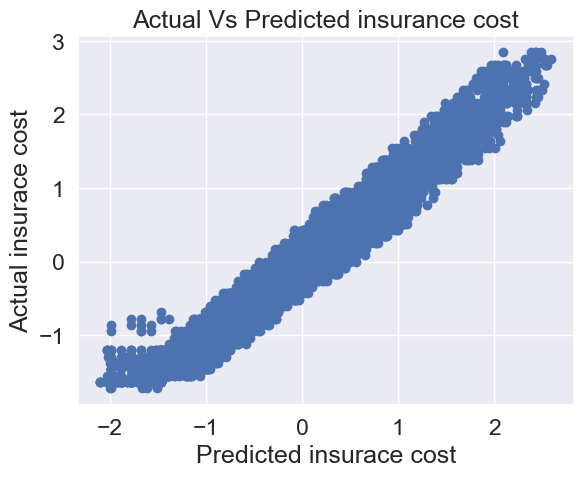

In [145]:
plt.scatter(model17_predicted_test,y_test)
plt.ylabel('Actual insurace cost')
plt.xlabel('Predicted insurace cost')
plt.title('Actual Vs Predicted insurance cost')
plt.show

Based on the above performance metrics such as R-Squared, RMSE, MAPE we don't see any kind of overfitting in our model as train and test score are almost same.

From above model we got most significant variables with their coeeficients and from above scatter plot between actual Vs predicted values a linear relation find out.

### Decision Tree regressor  pruning 

We are using GridSearchCV for finding the optimal parameter values from a given set of parameters in a grid.

In [146]:
from sklearn.model_selection import GridSearchCV

In [147]:
param_grid = {
    'criterion': ['squared_error','absolute_error'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtr = DecisionTreeRegressor(random_state=1)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 2)

In [148]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [10, 20, 30, 50],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [150, 300, 450]})

In [149]:
print(grid_search.best_params_)
model18 = grid_search.best_estimator_
model18

{'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}


DecisionTreeRegressor(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                      random_state=1)

In [150]:
model18_predicted_train=model18.predict(X_train)
model18_predicted_test=model18.predict(X_test)

In [151]:
print('R Square on training data:', model18.score(X_train,y_train))
print('R Square on testing data:', model18.score(X_test,y_test))
print('RMSE on training data:', np.sqrt(metrics.mean_squared_error(y_train,model18_predicted_train)))
print('RMSE on testing data:', np.sqrt(metrics.mean_squared_error(y_test,model18_predicted_test)))
print('MAPE on training data:', np.sqrt(metrics.mean_absolute_percentage_error(y_train,model18_predicted_train)))
print('MAPE on testing data:', np.sqrt(metrics.mean_absolute_percentage_error(y_test,model18_predicted_test)))

R Square on training data: 0.9570376064848412
R Square on testing data: 0.9519873731369077
RMSE on training data: 0.20793799582429578
RMSE on testing data: 0.21746612985057712
MAPE on training data: 10.990872423273371
MAPE on testing data: 10.110111034548343


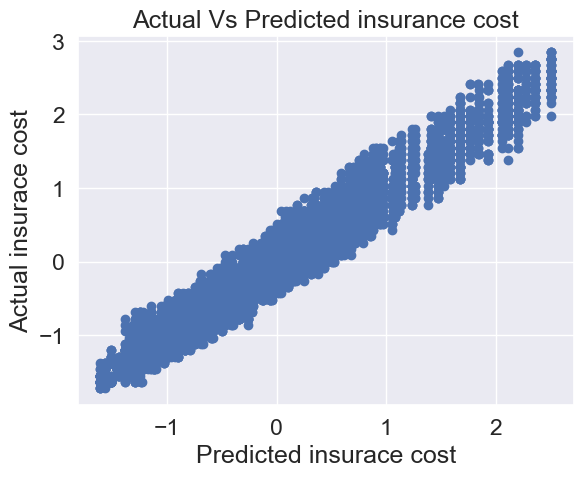

In [152]:
plt.scatter(model18_predicted_test,y_test)
plt.ylabel('Actual insurace cost')
plt.xlabel('Predicted insurace cost')
plt.title('Actual Vs Predicted insurance cost')
plt.show()

As we can see from above performance metrics that R square has improved and MAPE also reduced afer using different sets of parameters in decision tree regressor 

We have plotted actual and predicted values on scatter plot and we can see linear relation between Actual and predicted insurance costs.

### Random Forest Regressor Tuning

In [153]:
param_grid = {
    'max_depth': [5,10],
    'min_samples_split': [10,50], 
    'n_estimators': [301,501] 
}

rfr = RandomForestRegressor(random_state=1)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid)

In [154]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [5, 10], 'min_samples_split': [10, 50],
                         'n_estimators': [301, 501]})

In [155]:
print(grid_search.best_params_)
model19 = grid_search.best_estimator_
model19

{'max_depth': 10, 'min_samples_split': 50, 'n_estimators': 501}


RandomForestRegressor(max_depth=10, min_samples_split=50, n_estimators=501,
                      random_state=1)

In [156]:
model19_predicted_train=model19.predict(X_train)
model19_predicted_test=model19.predict(X_test)
print('R Square on training data:', model19.score(X_train,y_train))
print('R Square on testing data:', model19.score(X_test,y_test))
print('RMSE on training data:', np.sqrt(metrics.mean_squared_error(y_train,model19_predicted_train)))
print('RMSE on testing data:', np.sqrt(metrics.mean_squared_error(y_test,model19_predicted_test)))
print('MAPE on training data:', np.sqrt(metrics.mean_absolute_percentage_error(y_train,model19_predicted_train)))
print('MAPE on testing data:', np.sqrt(metrics.mean_absolute_percentage_error(y_test,model19_predicted_test)))

R Square on training data: 0.9627952244699269
R Square on testing data: 0.9532283325135238
RMSE on training data: 0.19350356192957943
RMSE on testing data: 0.21463736026277902
MAPE on training data: 10.739420822975772
MAPE on testing data: 10.083920367460228


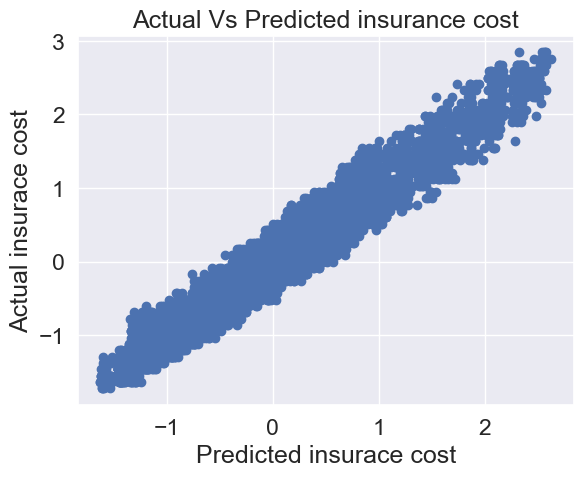

In [157]:
plt.scatter(model19_predicted_test,y_test)
plt.ylabel('Actual insurace cost')
plt.xlabel('Predicted insurace cost')
plt.title('Actual Vs Predicted insurance cost')
plt.show()

As we can see from above performance metrics that R square has improved and MAPE also reduced afer using different sets of parameters in Random forest regressor

We have plotted actual and predicted values on scatter plot and we can see linear relation between Actual and predicted insurance costs.

### Ridge Regressor Tuning

Ridge regression a similar form of Lasso regression where both regression put a toll on
coefficients by putting a penalty factor but with a difference where Lasso takes the
magnitude of coefficients while ridge takes square on the coefficients. This is L2
regularization technique.

In [158]:
param_grid = {'alpha':[1e-2,1e-1,0.4,0.7,1,3,5,7,15]}

Ridge_regressor = Ridge(random_state=1)

grid_search = GridSearchCV(estimator = Ridge_regressor, param_grid = param_grid, cv = 2)

In [159]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=Ridge(random_state=1),
             param_grid={'alpha': [0.01, 0.1, 0.4, 0.7, 1, 3, 5, 7, 15]})

In [160]:
print("Best value for lambda : ",grid_search.best_params_)
print("Best score for cost function: ", grid_search.best_score_)

Best value for lambda :  {'alpha': 0.01}
Best score for cost function:  0.9445460480304078


In [161]:
model20 = Ridge(random_state=1,alpha=0.01)
model20.fit(X_train,y_train)
print ("Ridge model:", (model20.coef_))

Ridge model: [-2.47805009e-03 -4.00521978e-02  2.41799555e-03 -2.92496675e-03
 -1.99131508e-03  3.12211234e-03  1.56341369e-03  1.48275746e-03
  1.54727310e-03  4.41359926e-05  9.69499392e-01  2.03341456e-02
 -5.90058605e-04  8.43551672e-02]


In [162]:
model20_predicted_train=model20.predict(X_train)
model20_predicted_test=model20.predict(X_test)
print('R Square on training data:', model20.score(X_train,y_train))
print('R Square on testing data:', model20.score(X_test,y_test))
print('RMSE on training data:', np.sqrt(metrics.mean_squared_error(y_train,model20_predicted_train)))
print('RMSE on testing data:', np.sqrt(metrics.mean_squared_error(y_test,model20_predicted_test)))
print('MAPE on training data:', np.sqrt(metrics.mean_absolute_percentage_error(y_train,model20_predicted_train)))
print('MAPE on testing data:', np.sqrt(metrics.mean_absolute_percentage_error(y_test,model20_predicted_test)))

R Square on training data: 0.9446812482764967
R Square on testing data: 0.9449781252252026
RMSE on training data: 0.23595316392813653
RMSE on testing data: 0.23279925373966812
MAPE on training data: 11.184615897593998
MAPE on testing data: 10.111299053324037


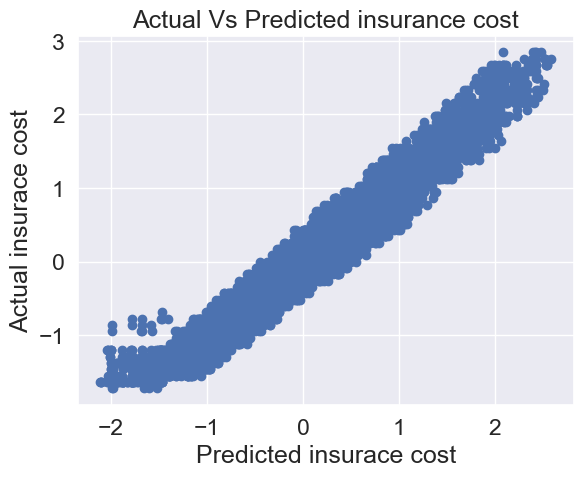

In [163]:
plt.scatter(model20_predicted_test,y_test)
plt.ylabel('Actual insurace cost')
plt.xlabel('Predicted insurace cost')
plt.title('Actual Vs Predicted insurance cost')
plt.show()

As we can see from above performance metrics that R square & RMSE has not improved much it almost same compare to the base model of Ridge and MAPE also not reduced even afer using best value of alpha in Ridge regressor which indicate that base model already given best possible result on this dataset.

We have plotted actual and predicted values on scatter plot and we can see linear relation between Actual and predicted insurance costs.

### lasso Regressor Tuning

In [164]:
param_grid = {'alpha':[1e-2,1e-1,0.4,0.7,1,3,5,7,15,20,30,50]}

Lasso_regressor = Lasso(random_state=1)

grid_search = GridSearchCV(estimator = Lasso_regressor, param_grid = param_grid, cv =5)

In [165]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=1),
             param_grid={'alpha': [0.01, 0.1, 0.4, 0.7, 1, 3, 5, 7, 15, 20, 30,
                                   50]})

In [166]:
print("Best value for lambda : ",grid_search.best_params_)
print("Best score for cost function: ", grid_search.best_score_)

Best value for lambda :  {'alpha': 0.01}
Best score for cost function:  0.9437244357726374


In [167]:
model21 = Lasso(random_state=1, alpha=0.01)
model21.fit(X_train,y_train)
print ("Lasso model:", (model21.coef_))

Lasso model: [ 0.         -0.03159012  0.         -0.         -0.          0.
  0.          0.          0.          0.          0.95638755  0.00414773
 -0.          0.03554509]


In [168]:
model21_predicted_train=model21.predict(X_train)
model21_predicted_test=model21.predict(X_test)
print('R Square on training data:', model21.score(X_train,y_train))
print('R Square on testing data:', model21.score(X_test,y_test))
print('RMSE on training data:', np.sqrt(metrics.mean_squared_error(y_train,model21_predicted_train)))
print('RMSE on testing data:', np.sqrt(metrics.mean_squared_error(y_test,model21_predicted_test)))
print('MAPE on training data:', np.sqrt(metrics.mean_absolute_percentage_error(y_train,model21_predicted_train)))
print('MAPE on testing data:', np.sqrt(metrics.mean_absolute_percentage_error(y_test,model21_predicted_test)))

R Square on training data: 0.9437953514570824
R Square on testing data: 0.944357953169224
RMSE on training data: 0.23783498439881917
RMSE on testing data: 0.23410756103894342
MAPE on training data: 11.177484525320617
MAPE on testing data: 10.137942966442264


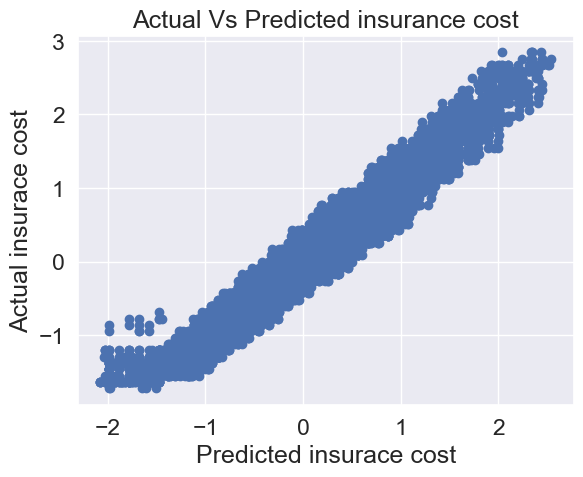

In [169]:
plt.scatter(model21_predicted_test,y_test)
plt.ylabel('Actual insurace cost')
plt.xlabel('Predicted insurace cost')
plt.title('Actual Vs Predicted insurance cost')
plt.show()

From GridsearchCV we got best alpha value 0.01 and built Lasso regression model but there is no improvment in accuracy it's almost same compare to base model but advantage of this tuned model is that it minimize the coeficient to zero for 2 variables.

### XGBoost Tuning

In [170]:
param_grid = {
    'n_estimators': [401,801],
    'max_depth': [5,10,15]
}

Xgbr = xgb.XGBRegressor(random_state=1)

grid_search = GridSearchCV(estimator = Xgbr, param_grid = param_grid, cv = 3)

In [171]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=1, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
          

In [172]:
print(grid_search.best_params_)
model22 = grid_search.best_estimator_
model22

{'max_depth': 5, 'n_estimators': 401}


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=401, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [173]:
model22_predicted_train=model22.predict(X_train)
model22_predicted_test=model22.predict(X_test)

In [174]:
print('R Square on training data:', model22.score(X_train,y_train))
print('R Square on testing data:', model22.score(X_test,y_test))
print('RMSE on training data:', np.sqrt(metrics.mean_squared_error(y_train,model22_predicted_train)))
print('RMSE on testing data:', np.sqrt(metrics.mean_squared_error(y_test,model22_predicted_test)))
print('MAPE on training data:', np.sqrt(metrics.mean_absolute_percentage_error(y_train,model22_predicted_train)))
print('MAPE on testing data:', np.sqrt(metrics.mean_absolute_percentage_error(y_test,model22_predicted_test)))

R Square on training data: 0.9846940262693852
R Square on testing data: 0.947405605312895
RMSE on training data: 0.1241138081708206
RMSE on testing data: 0.227605955899965
MAPE on training data: 8.826275872996527
MAPE on testing data: 10.374904538355796


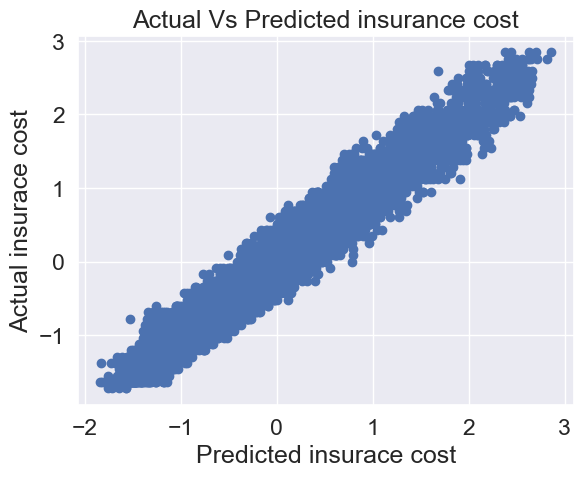

In [175]:
plt.scatter(model22_predicted_test,y_test)
plt.ylabel('Actual insurace cost')
plt.xlabel('Predicted insurace cost')
plt.title('Actual Vs Predicted insurance cost')
plt.show()

Based on the results obtained, it is an overfitted model even with pruning of
hyperparameters. As per training and test scores there are
overfitting issues in this and hence this model is not suitable for the implementation stage.
this model is performing very well on training data but will not perform same way in testing/unseen data therefore this model is not suitable.
XGB is mostly used for weaker models. But since random forest/Decision tree
regressor gave accurate results, XGB model not significant for this model.

Now Let's compare all model's accuracy and find out best optimum model

In [176]:
index=['Accuracy/R Square', 'RMSE', 'MAPE']
dataa = pd.DataFrame({'Linear Regression Train':[0.94,0.24,11.19],
        'Linear Regression Test':[0.94,0.23,10.10],
        'Decision Tree Regressor Train':[0.96,0.21,10.99],
        'Decision Tree Regressor Test':[0.95,0.22,10.11],
        'Random Forest Regressor Train':[0.96,0.19,10.74],
        'Random Forest Regressor Test':[0.95,0.21,10.08],
        'Ridge Regressor Train':[0.94,0.24,11.18],
        'Ridge Regressor Test':[0.94,0.23,10.11],
        'Lasso Regressor Train':[0.94,0.24,11.18],
        'Lasso Regressor Test':[0.94,0.23,10.14],
        'XGB Regressor Train':[0.98,0.12,8.82],
        'XGB Regressor Test':[0.95,0.23,10.37]},index=index)
round(dataa,2)

,Linear Regression Train,Linear Regression Test,Decision Tree Regressor Train,Decision Tree Regressor Test,Random Forest Regressor Train,Random Forest Regressor Test,Ridge Regressor Train,Ridge Regressor Test,Lasso Regressor Train,Lasso Regressor Test,XGB Regressor Train,XGB Regressor Test
Accuracy/R Square,0.94,0.94,0.96,0.95,0.96,0.95,0.94,0.94,0.94,0.94,0.98,0.95
RMSE,0.24,0.23,0.21,0.22,0.19,0.21,0.24,0.23,0.24,0.23,0.12,0.23
MAPE,11.19,10.10,10.99,10.11,10.74,10.08,11.18,10.11,11.18,10.14,8.82,10.37


As per checking the accuracy score of all these models we can say that except XGB regressor all other model perform quite well.

Out of all these models Decision Tree Regressor is an optimum model as MAPE is lowest in this model and R Squared is also high.

As we have seen that Decision Tree Regressor is the best model so let's find out feature importance based on this best model.

In [177]:
d= {'Feature': X_train.columns , 'Coefficient': model18.feature_importances_}
dtr_feature = pd.DataFrame(data=d)

In [178]:
dtr_feature.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
10,weight,0.993987
13,covered_by_any_other_company_Y,0.002354
1,regular_checkup_lasy_year,0.001428
11,weight_change_in_last_one_year,0.000671
0,years_of_insurance_with_us,0.000377
4,daily_avg_steps,0.000296
8,avg_glucose_level,0.000290
9,bmi,0.000226
12,fat_percentage,0.000161
5,age,0.000136


Insights from this Case study:

1. From EDA we got to know the significance of categorical variables and only 1 variable was significant.

2. From heatmap we don't see a high correlation b/w variable.

3. Most of the customers cholesterol_level is normal and they don't smoke.

4. As we have seen in scatter plot that weight is correlated to insurance cost so we can interpret that weight b/w 78 to 96 leads to the high insurance cost.

5. From DTR feature importance, 3 variables:  'other_major_decs_history’,       'heart_decs_history’, ‘adventure_sports' have 0 Coefficient that means 
these variables have no contribution in predicting Insurance Cost therefore these are not important so these can be ignored.

6. Weight is the most important variable as it alone has coefficient of 0.99 that means this variable has 99% contribution in predicting insurance cost and same, we observed in Heatmap that this variable was highly correlated with Target variable and our model also proved it.

7. Weight being an important variable sounds logical as we know that overweight has high effect on health it can be reason of many diseases and therefore other variables such as BMI, Fat_percentage, Avg glucose level, heart_decs, other_decs all these are related to weight if weight is in control, then these variables will also be in control in most of the cases except genetics-based disease.

Recommendations:

1. As we have seen that all model performed quite well and Linear regression provided 4 most important variables (‘regular_checkup_lasy_year’, ‘weight’, ‘weight_change_in_last_one_year’, ‘covered_by_any_other_company_Y’) so these variables need to be checked properly.

2. Out of those 4 variables one variable ‘Weight’ was found very important in EDA where we observed that target variable is highly correlated with this variable. 


3. These are 3 non important variable as per DTR model adventure_sports, heart_decs_history, other_major_decs_history and same we observed in our linear equation that these variables were removed as these were non-significant so company don’t need to give more weightage to these variables.


4. There might be few important variables such as past claim history, past claim settlement amount or any other claim related details because these details can provide additional information about an individual’s frequent illness, disease, cause of illness etc.
5. As we have seen that Weight is very important variable for predicting insurance cost and there is similar variable present which is ‘Weight change in a year’ but this variable is not so important for prediction based on feature importance and this might be because change in weight is not specified whether weight has increased or it decreased in last 1 year so this needs to be noted carefully while collecting data whether weight change leading to weight increase or decrease and if this is obtained then this variable might be very helpful to find out individuals recent activities towards his/her health.

6. We know there are some customers who is associated with the same insurance company for more than 5 years so these are valuable customers and company can use these customer's feedback/survey to identified reason of their trust which can be used while giving plan to other new/not happy customers.
